# Cálculo de tendencia climática

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import plotly.graph_objects as go
import scienceplots # !pip install SciencePlots  plt.style.available #tienen que aparecer science y ieee

## Actualización de datos
Se cargan los datos desde Merra, según se configure en el archivo `.txt`. Sino, se carga el archivo `.csv` desde el Gdrive.

# Lectura de datos para analizar

## Leer datos del archivo `.cvs`


-BEGIN HEADER-

[NASA/POWER CERES/MERRA2](https://power.larc.nasa.gov/data-access-viewer/) Native Resolution Daily Data

Dates (month/day/year): 01/01/2000 through 12/12/2022

Location: Latitude  -28.454637   Longitude -65.764005
lonlat = c(-65.764005, -28.454637), #Catamarca

lonlat = c(-64.512592,-31.446667), #Córdoba

lonlat = c(-65.2454 ,-27.6551), #Lamadrid


Elevation from MERRA-2: **Average for 0.5 x 0.625 degree lat/lon region** = 330.23 meters

The value for missing source data that cannot be computed or is outside of the sources availability range: -999

Parameter(s):

T2M             MERRA-2 Temperature at 2 Meters (C)

T2MDEW          MERRA-2 Dew/Frost Point at 2 Meters (C)

T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C)

TS              MERRA-2 Earth Skin Temperature (C)

QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg)

RH2M            MERRA-2 Relative Humidity at 2 Meters (%)

PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day)

PS              MERRA-2 Surface Pressure (kPa)

WS10M           MERRA-2 Wind Speed at 10 Meters (m/s)

WS10M_MAX       MERRA-2 Wind Speed at 10 Meters Maximum (m/s).

WS10M_MIN       MERRA-2 Wind Speed at 10 Meters Minimum (m/s)

WS10M_RANGE     MERRA-2 Wind Speed at 10 Meters Range (m/s)

WD10M           MERRA-2 Wind Direction at 10 Meters (Degrees)

WS50M           MERRA-2 Wind Speed at 50 Meters (m/s)

WS50M_MAX       MERRA-2 Wind Speed at 50 Meters Maximum (m/s)

WS50M_MIN       MERRA-2 Wind Speed at 50 Meters Minimum (m/s)

WS50M_RANGE     MERRA-2 Wind Speed at 50 Meters Range (m/s)

WD50M           MERRA-2 Wind Direction at 50 Meters (Degrees)

-END HEADER-

In [38]:
# df = pd. read_csv ('/content/drive/MyDrive/2020 Curso ML Extensionista/2023_CAPE_.csv', header = 0,  sep = ',') #CARGA desde el Gdrive
#df = pd. read_csv ('2024_CAPE_.csv', header = 0,  sep = ',') # Datos disponibles en https://mega.nz/file/C1A2XYyb#-uHRVkeUB6kTvSmQziDucAu0kcL3Thw9vXdgRr1t92A
# df = pd. read_csv ('2024_07_Catamarca.csv', header = 0,  sep = ',') # Datos disponibles en https://mega.nz/file/O95wgLKA#swvkQB0bvL0l4YWFDNlzamh9gtn9IuIOXD0gWt3-YKE
df = pd. read_csv ('2024_07_Cordoba.csv', header = 0,  sep = ',') # Datos disponibles en https://mega.nz/file/O95wgLKA#swvkQB0bvL0l4YWFDNlzamh9gtn9IuIOXD0gWt3-YKE

Anio_inicial=df['YEAR'][0]
Anio_final=df['YEAR'][len(df)-1]
print(df.head(2))
print(df.tail(2))

   YEAR  MO  DY    T2M  T2MDEW  T2MWET     TS  QV2M   RH2M  PRECTOTCORR  ...  \
0  1981   1   1  18.05    9.50   13.77  18.04  8.06  62.19         0.85  ...   
1  1981   1   2  19.90   11.58   15.73  19.51  9.22  63.06         0.17  ...   

   WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M  WS50M  WS50M_MAX  \
0   2.59       3.37       1.53         1.84  168.25   4.66       5.66   
1   1.59       2.63       0.88         1.74  156.69   2.60       4.74   

   WS50M_MIN  WS50M_RANGE   WD50M  
0       2.49         3.17  168.56  
1       0.33         4.41  160.19  

[2 rows x 21 columns]
       YEAR  MO  DY    T2M  T2MDEW  T2MWET    TS  QV2M   RH2M  PRECTOTCORR  \
15886  2024   6  30  11.44   -0.83    5.30  10.3  3.91  47.06          0.0   
15887  2024   7   1  10.73   -0.45    5.14  10.0  3.97  50.56          0.0   

       ...  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M  WS50M  \
15886  ...   2.54       4.17       0.55         3.62  235.62   4.28   
15887  ...   2.20       3.31   

### Enfocando en el sitio bajo interés dado el error del 22 de junio de 2021



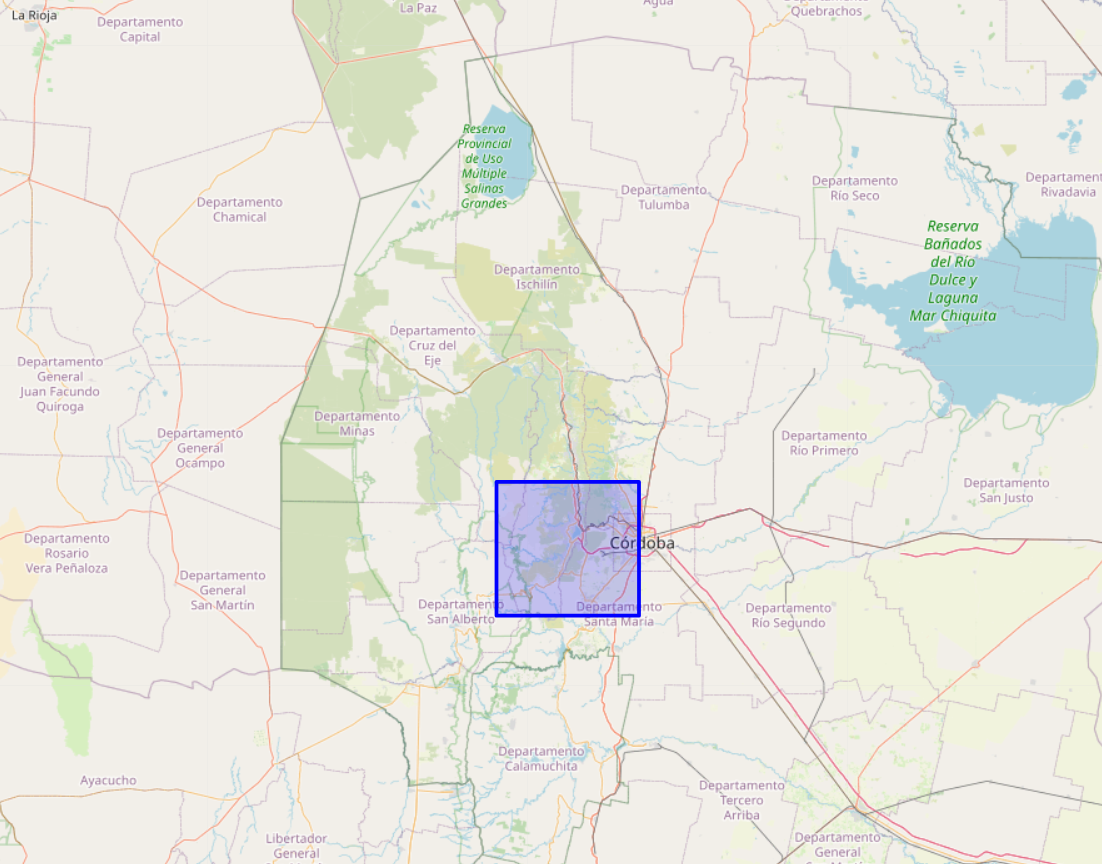

### Carga el día fallado

In [3]:
df_F = pd. read_csv ('POWER_Point_Daily_20210620_20210626_028d4546S_065d7640W_LST.csv', header = 20,  sep = ',') # Datos disponibles en https://mega.nz/file/O95wgLKA#swvkQB0bvL0l4YWFDNlzamh9gtn9IuIOXD0gWt3-YKE

In [ ]:
df_F.head(4)

In [ ]:
df_F['PRECTOTCORR']

In [ ]:
df.head(3)

In [31]:
df_t=np.array(range(len(df['YEAR'])), dtype=np.dtype('datetime64[s]'))
lluvia=np.array(range(len(df_t)), float)
for i in range(len(df['YEAR'])):
   df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')    
  # df_t[i]= pd.DatetimeIndex( [str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])])
   lluvia[i] = df['PRECTOTCORR'][i]
   if df['PRECTOTCORR'][i]<0:
     lluvia[i]=0. #lluvia tiene los valores arreglados
df_Pre=pd.DataFrame({ 't': df_t,'LL': lluvia}) # Siempre conviene armar un DataFrame para graficar y procesar los datos

## Cargo datos del CAPE propietarios
El sitio actual (31/5/2024) es http://www.meteo.sucytca.gob.ar/index.php

In [12]:
# df_CAPE = pd. read_csv ('SuCyTCa-CAPE.csv',header=None,   sep = ';') # Dato SuCyTCa-CAPE
df_CAPE = pd. read_csv ('SuCyTCa-CAPE.csv',header=0,   sep = ';') # Dato SuCyTCa-CAPE
df_CAPE.head(3)
# df_CAPE.iloc[0]
# df_CAPE['Fecha '][0]
# df_CAPE['Fecha ']=pd.to_datetime(df_CAPE['Fecha '])

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\1139564477.py:2: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_CAPE = pd. read_csv ('SuCyTCa-CAPE.csv',header=0,   sep = ';') # Dato SuCyTCa-CAPE


Fecha   Temperatura_Ambiente [°C]  Humedad_Relativa [%]  \
0  30/1/2020 0:15                       25.1                  51.2   
1  30/1/2020 0:30                       24.7                  53.0   
2  30/1/2020 0:45                       23.8                  59.0   

  Presion_Atmosferica [hPa] Radiacion_Solar [W/m2]  Precipitacion [mm]  \
0                     953.8                    0.0                 0.0   
1                     953.9                    0.0                 0.0   
2                     954.2                    0.0                 0.0   

   Precipitacion_Acum._Diaria [mm]  Veloc._de_Viento_Max_10m [Km/h]  \
0                              0.0                             16.9   
1                              0.0                             11.5   
2                              0.0                             11.5   

   Veloc._de_Viento_Min_10m [Km/h]  Veloc._de_Viento_Prom._10m [Km/h]  \
0                              3.6                                9.7   
1                              0.0                                5.2   
2                              0.0                                4.4   

   Direccion_de_Viento_a_10m [°] Direccion_a_10m   \
0                          176.8                S   
1                          130.2              SSE   
2                          155.5              SSO   

  Veloc._de_Viento_Max_2m [Km/h]  Veloc._de_Viento_Min_2m [Km/h]  \
0                           11.5                             0.0   
1                            9.0                             0.0   
2                            3.6                             0.0   

   Veloc._de_Viento_Prom._2m [Km/h]  Direccion_de_Viento_a_2m [°]  \
0                               5.4                         181.0   
1                               1.7                         149.2   
2                               0.1                         165.8   

  Direccion_a_2m   Evaporimetro [mm]  Evaporacion_Acum._Diaria [mm]  
0               S               0.08                           0.08  
1               S               0.09                           0.17  
2             SSE               0.09                           0.26

In [25]:
df_CAPE['Temperatura_Ambiente [°C]'][0]
df_CAPE['Precipitacion_Acum._Diaria [mm]'][0]
df_CAPE['Fecha ']=pd.to_datetime(df_CAPE['Fecha '], dayfirst=True)
df_CAPE.head(3)

Fecha   Temperatura_Ambiente [°C]  Humedad_Relativa [%]  \
0 2020-01-30 00:15:00                       25.1                  51.2   
1 2020-01-30 00:30:00                       24.7                  53.0   
2 2020-01-30 00:45:00                       23.8                  59.0   

  Presion_Atmosferica [hPa] Radiacion_Solar [W/m2]  Precipitacion [mm]  \
0                     953.8                    0.0                 0.0   
1                     953.9                    0.0                 0.0   
2                     954.2                    0.0                 0.0   

   Precipitacion_Acum._Diaria [mm]  Veloc._de_Viento_Max_10m [Km/h]  \
0                              0.0                             16.9   
1                              0.0                             11.5   
2                              0.0                             11.5   

   Veloc._de_Viento_Min_10m [Km/h]  Veloc._de_Viento_Prom._10m [Km/h]  \
0                              3.6                                9.7   
1                              0.0                                5.2   
2                              0.0                                4.4   

   Direccion_de_Viento_a_10m [°] Direccion_a_10m   \
0                          176.8                S   
1                          130.2              SSE   
2                          155.5              SSO   

  Veloc._de_Viento_Max_2m [Km/h]  Veloc._de_Viento_Min_2m [Km/h]  \
0                           11.5                             0.0   
1                            9.0                             0.0   
2                            3.6                             0.0   

   Veloc._de_Viento_Prom._2m [Km/h]  Direccion_de_Viento_a_2m [°]  \
0                               5.4                         181.0   
1                               1.7                         149.2   
2                               0.1                         165.8   

  Direccion_a_2m   Evaporimetro [mm]  Evaporacion_Acum._Diaria [mm]  
0               S               0.08                           0.08  
1               S               0.09                           0.17  
2             SSE               0.09                           0.26

## Corrección del 14782	2021-06-22	244.70

In [37]:
# df_Pre['LL'][14289:-1]
df_Pre[14800-20:14805-20]
# 14782	2021-06-22	244.70
df_Pre.loc[14782,'LL']=df_Pre['LL'][14781]
df_Pre[14800-20:14805-20]

t     LL
14780 2021-06-20   0.00
14781 2021-06-21  11.78
14782 2021-06-22  11.78
14783 2021-06-23   0.00
14784 2021-06-24   0.00

### Inundaciones y crecidas del Ríos en zona de estudio Región Córdoba (desde 1981 a la fecha)

---


Año	Mes	Letras	Detalles
1985	1	Enero	Fuertes lluvias causaron inundaciones en varias partes de Córdoba, incluyendo zonas cercanas a la capital.

1992	3	Marzo	 Lluvias intensas durante varios días causaron inundaciones en la ciudad y  reas suburbanas. Se registraron evacuaciones masivas y pérdidas agrícolas significativas.

1992	12	Diciembre	Lluvias intensas provocaron crecidas en r¡os y arroyos, afectando  reas urbanas y rurales.

2003	4	Abril	Lluvias extraordinarias (m s de 200 mm en 48 horas) causaron inundaciones generalizadas. Se reportaron cortes de energ¡a y desbordamiento de alcantarillados.

2015	2	Febrero	Intensas precipitaciones en las Sierras Chicas provocaron inundaciones que afectaron a diversas localidades, incluyendo Villa Allende, R­o Ceballos y Ascochinga, causando daÏos materiales significativos y p?rdidas humanas.

2017	3	Marzo	Fuertes tormentas afectaron la regi¢n, provocando inundaciones y da¤os en viviendas y caminos. Crecida Rio Anisacate.

2021	1	Enero	 En la regi¢n de Alta Gracia, las lluvias intensas provocaron crecidas del R¡o Anisacate.

2022	1	Enero	Fuertes lluvias provocaron crecidas en los r­os serranos del norte del Valle de Punilla, impactando negativamente en las comunidades locales y en la infraestructura de la zona.

2023	12	Diciembre	 En Alta Gracia y su  área circundante, las precipitaciones récord a finales de diciembre de 2023 causaron desbordes del río Anisacate.



---


    Año  Mes     Letras                                           Detalles
7  2022    1      Enero  Fuertes lluvias provocaron crecidas en los r­o...
8  2023   12  Diciembre   En Alta Gracia y su  área circundante, las pr...


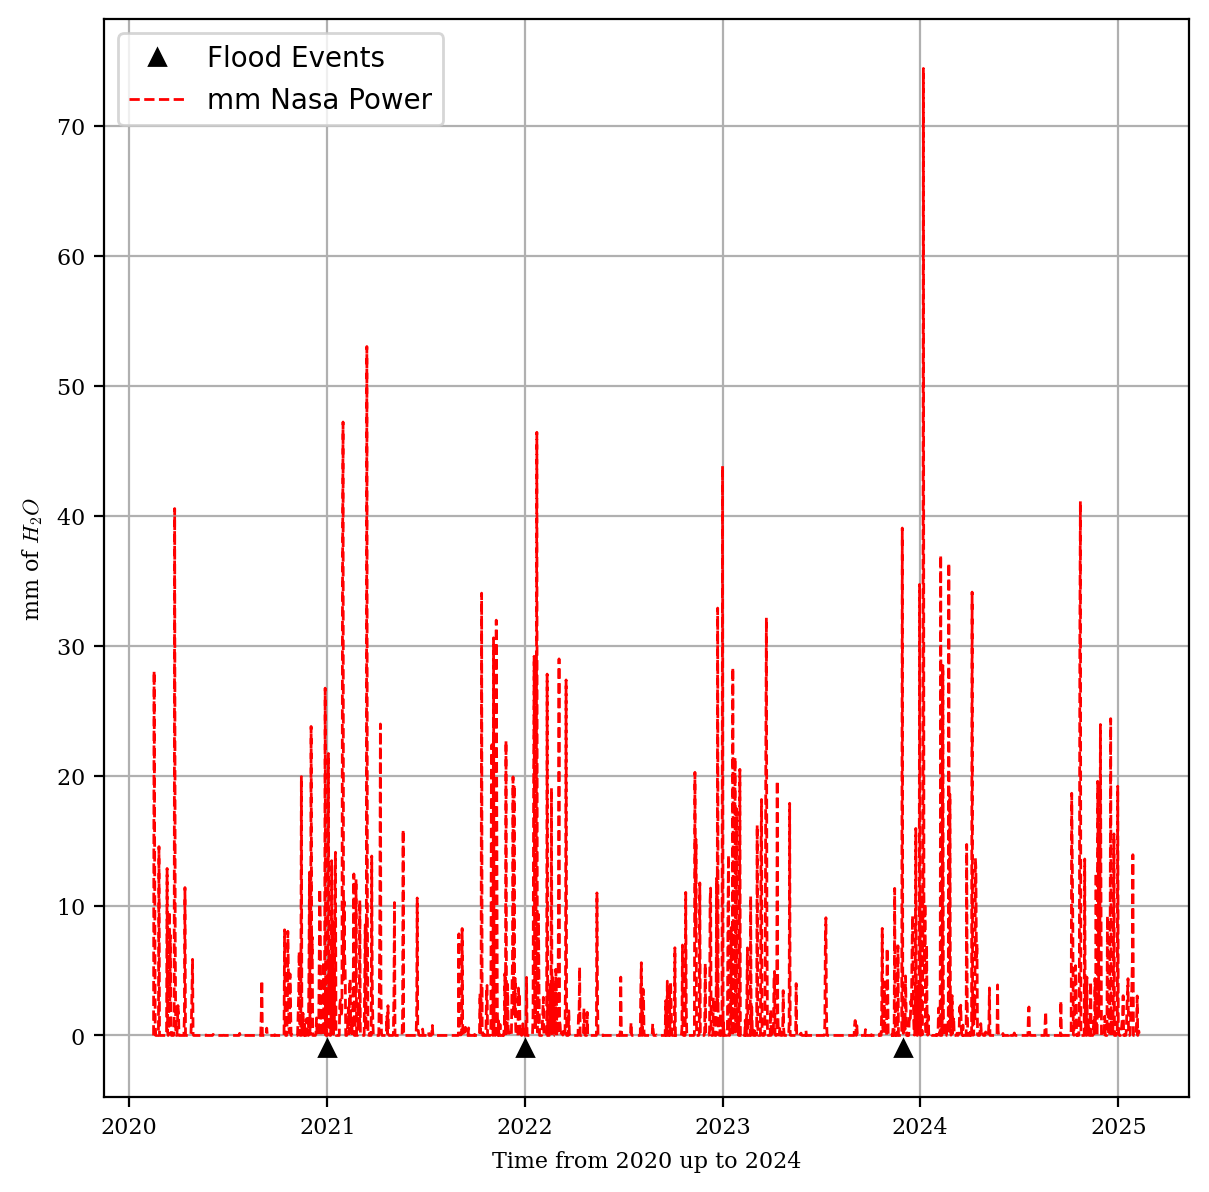

In [39]:
# df_C = pd. read_csv ('Inundaciones y crecidas del Rio Ambato.csv', header = 0,  sep = ';') # Datos disponibles en https://mega.nz/file/OlxwkA5Y#AWUCUxwQ88VdJI-XgUCdT0YDOgc---obQtz3apsB84g
df_C = pd. read_csv ('Inundaciones y crecidas de Cba.csv', header = 0,  sep = ';') # Datos disponibles
# Anio_inicial=df['YEAR'][0]
# Anio_final=df['YEAR'][len(df)-1]
# print(df_C.head(21))
print(df_C.tail(2))
# print(df_C['Año'][0:])
df_te=np.array(range(len(df_C['Año'])), dtype=np.dtype('datetime64[s]'))
Eventos=np.array(range(len(df_te)), float)
for i in range(len(df_C['Año'])):
   df_te[i]= pd.to_datetime( str(df_C['Año'][i])+'-'+str(df_C['Mes'][i]))
   Eventos[i] = 1.
# for i in range(len(df['YEAR'])):
#    df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')
df_Eventos = pd.DataFrame({'t_Evento': df_te,'Eventos': Eventos})
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(figsize=(7,7), dpi= 200)
#fig.suptitle('Mediciones remotas, automáticas y eventos severos de inundaciones registrados')
plt.plot(df_Eventos['t_Evento'][6:],-1*df_Eventos['Eventos'][6:], 'k' , linewidth=0,marker='^')
plt.plot(df_Pre['t'][14289:-1],df_Pre['LL'][14289:-1] , linewidth =1)
#plt.plot(df_Pre['t'],df['TS'] , linewidth=0.5)
# plt.plot(df_CAPE['Fecha '],df_CAPE['Precipitacion_Acum._Diaria [mm]'], linewidth=1)
#fig.add_trace(go.Scatter(x=df_CAPE['Fecha '], y=df_CAPE['Precipitacion_Acum._Diaria [mm]'], mode='lines', name='Precipitacion Acum. Diaria [mm]'))
# fig.add_trace(go.Scatter(x=df_Pre['t'], y=df_Pre['LL'], mode='lines', name='Lluvia Nasa Power'))
# fig.add_trace(go.Scatter(x=df_Pre['t'], y=df['T2M'], mode='lines', name='ºC a 2 m (C) Nasa Power'))
# fig.add_trace(go.Scatter(x=df_Pre['t'], y=df['TS'], mode='lines', name='ºC de suelo (C) Nasa Power'))
axs.legend(['Flood Events','mm Nasa Power','mm CAPE'])
axs.grid( True )
#plt.xlabel('Año hasta '+ str(df_Pre['t'][-1:].iloc[0]))
plt.xlabel('Time from 2020 up to '+ str(int(df.iloc[-1]['YEAR'])))
plt.ylabel('mm of $H_2O$')
plt.show()

In [42]:
# df_CAPE['Fecha ']=pd.to_datetime(df_CAPE['Fecha'])
# df_C = pd. read_csv ('Inundaciones y crecidas del Rio Ambato.csv', header = 0,  sep = ';') # Datos disponibles en https://mega.nz/file/OlxwkA5Y#AWUCUxwQ88VdJI-XgUCdT0YDOgc---obQtz3apsB84g
fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_CAPE['Fecha '], y=df_CAPE['Temperatura_Ambiente [°C]'], mode='lines', name='Temperatura Ambiente [°C]'))
# fig.add_trace(go.Scatter(x=df_CAPE['Fecha '], y=df_CAPE['Temperatura_Ambiente [°C]'], mode='lines', name='Temperatura_Ambiente ºC'))
fig.add_trace(go.Scatter(x=df_Pre['t'][14289:-1], y=df_Pre['LL'][14289:-1], mode='lines', name='Nasa Power'))
# fig.add_trace(go.Scatter(x=df_CAPE['Fecha '], y=df_CAPE['Precipitacion_Acum._Diaria [mm]'], mode='lines', name='CAPE Central Meteorológica'))
# fig.add_trace(go.Scatter(x=df_Pre['t'][14289:-1], y=df['T2M'][14289:-1], mode='lines', name='ºC a 2 m (C) Nasa Power'))
# fig.add_trace(go.Scatter(x=df_Pre['t'][14289:-1], y=df['TS'][14289:-1], mode='lines', name='ºC de suelo (C) Nasa Power'))
fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][6:], y=-2*df_Eventos['Eventos'][6:], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Flood Events'))
fig.update_layout(#title='Precipitaciones y Eventos',
                  xaxis_title='Time',
                  yaxis_title='mm of H<sub>2</sub>O',
                  legend_title='Sensor Measurements',                  
                  showlegend = True)                
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

In [43]:
df_Eventos.tail(3)

t_Evento  Eventos
6 2021-01-01      1.0
7 2022-01-01      1.0
8 2023-12-01      1.0

In [44]:
df_C.head(2)

Año  Mes Letras                                           Detalles
0  1985    1  Enero  Fuertes lluvias causaron inundaciones en varia...
1  1992    3  Marzo   Lluvias intensas durante varios días causaron...

In [36]:
# 14782	2021-06-22	244.70
lluvia[14782]

0.0

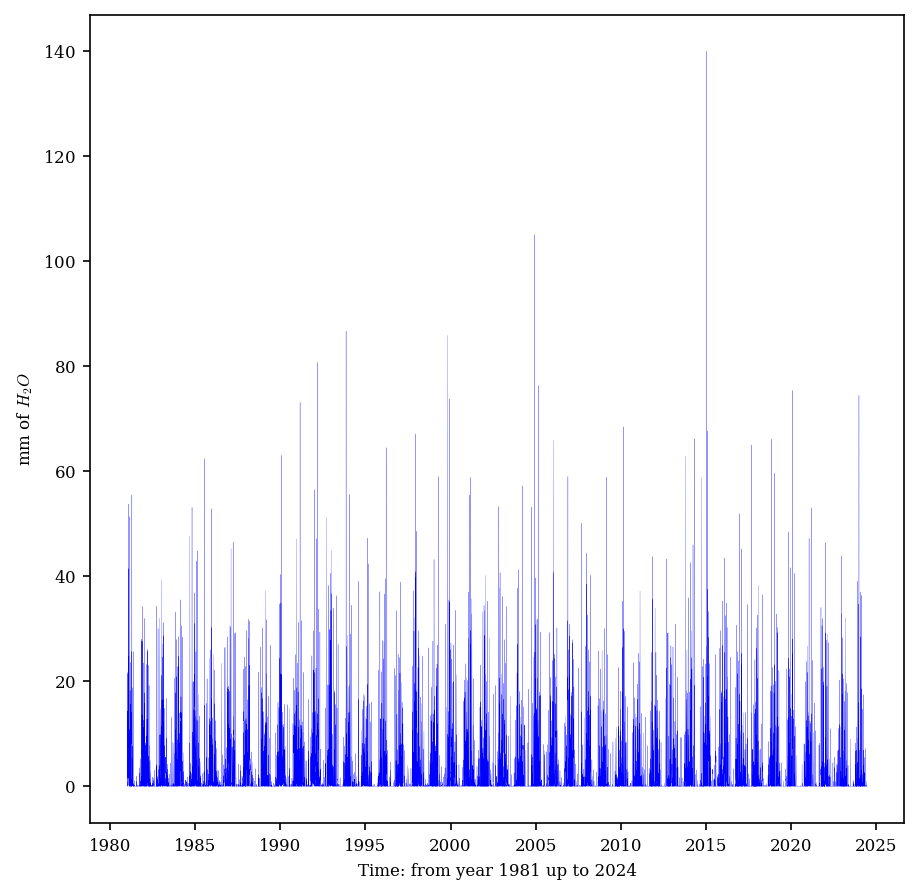

In [45]:
df_t=np.array(range(len(df['YEAR'])), dtype=np.dtype('datetime64[s]'))
# df_t=np.array(range(len(df['YEAR'])), dtype=np.dtype('int32'))
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(figsize=(7,7), dpi= 150)
#fig.suptitle('MERRA-2 - Daily Precipitation [mm]')
lluvia=np.array(range(len(df_t)), float)
# Plot the raw time series
for i in range(len(df['YEAR'])):
   df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')
   lluvia[i] = df['PRECTOTCORR'][i]
   if df['PRECTOTCORR'][i]<0:
    lluvia[i]=0. #lluvia tiene los valores arreglados
    # pd.DatetimeIndex  In [53]: dates = pd.DatetimeIndex(['2010-10-17', '2011-05-13', "2012-01-15"])
  # df_t[i]= pd.DatetimeIndex( [str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])])
#Corregimos el outlier usando Naive
lluvia[14782]=lluvia[14782-1]
df_Pre=pd.DataFrame({ 't': df_t,'LL': lluvia}) # Siempre conviene armar un DataFrame para graficar y procesar los datos
# for i in range(len(df['PRECTOTCORR'])):
axs.plot(df_t,lluvia, 'b' , linewidth =.10)
# plt.plot(df_Eventos['t_Evento'],df_Eventos['Eventos'], 'k' , linewidth=0,marker='o')
# # axs[1].set_title('Divergencia Kullback-Leibler $\sigma_1$');
# plt.xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))));
plt.xlabel('Time: from year 1981 up to '+ str(int(df.iloc[-1]['YEAR'])));
plt.ylabel('mm of $H_2O$')
plt.show()

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][1:], y=-10*df_Eventos['Eventos'][1:], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Flood Events'))
fig.add_trace(go.Scatter(x=df_Pre['t'], y=df_Pre['LL'], mode='lines', name='Rainfall'))
# fig.add_trace(go.Scatter(x=df_DWv['t'], y=df_DWv['Sigma2'], mode='lines', name='Sigma 2'))
fig.update_layout(title='Precipitations and Flood Events Recorded',
                  xaxis_title='Time [Seg.]',
                  yaxis_title='mm of H<sub>2</sub>O',
                  legend_title='Variables',
                  showlegend=True,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01)
                  )
fig.show()

In [47]:
df_Eventos.head()
str(df_t[-1])[0:4]
df_Eventos['t_Evento'][1:-1]

1   1992-03-01
2   1992-12-01
3   2003-04-01
4   2015-02-01
5   2017-03-01
6   2021-01-01
7   2022-01-01
Name: t_Evento, dtype: datetime64[s]

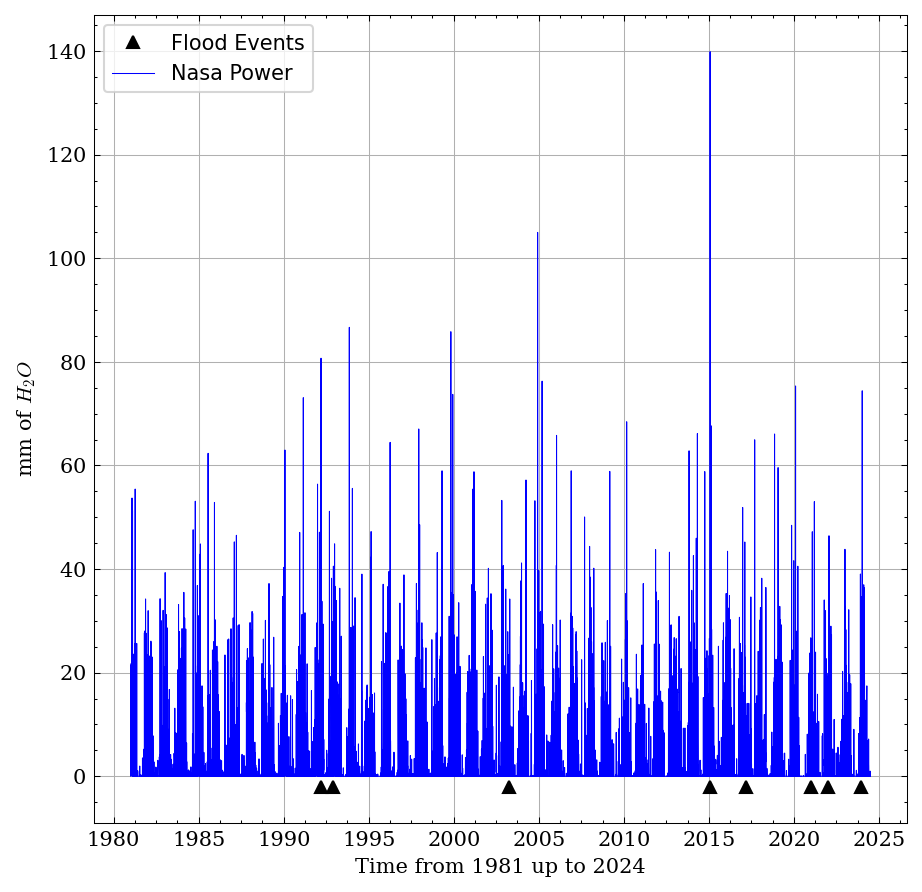

In [48]:
df_te=np.array(range(len(df_C['Año'])), dtype=np.dtype('datetime64[s]'))
Eventos=np.array(range(len(df_te)), float)
for i in range(len(df_C['Año'])):
   df_te[i]= pd.to_datetime( str(df_C['Año'][i])+'-'+str(df_C['Mes'][i]))
   Eventos[i] = 1.
# for i in range(len(df['YEAR'])):
#    df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')
df_Eventos = pd.DataFrame({'t_Evento': df_te,'Eventos': Eventos})
# # with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(figsize=(7,7), dpi= 150)
#fig.suptitle('Eventos severos de precipitaciones registrados')
plt.plot(df_Eventos['t_Evento'][1:],-2*df_Eventos['Eventos'][1:], 'k' , linewidth=0,marker='^')
plt.plot(df_t,lluvia, 'b' , linewidth =.50)
# plt.plot(df_CAPE['Fecha '],df_CAPE['Precipitacion_Acum._Diaria [mm]'],color='r', linewidth=.1)
axs.legend(['Flood Events','Nasa Power','mm CAPE'])
axs.grid(True)
# plt.xlabel('Año hasta '+ str(df_C['Año'][-1:].iloc[0]))
plt.ylabel('mm of $H_2O$')
plt.xlabel('Time from 1981 up to '+ str(df_t[-1])[0:4])
plt.show()

In [ ]:
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
# !apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super #ésto es para instalar LATEX en estilo Science
# import scienceplots #!pip install SciencePlots !pip install SciencePlots # !pip install git+https://github.com/garrettj403/SciencePlots plt.style.available #tienen que aparecer science y ieee 

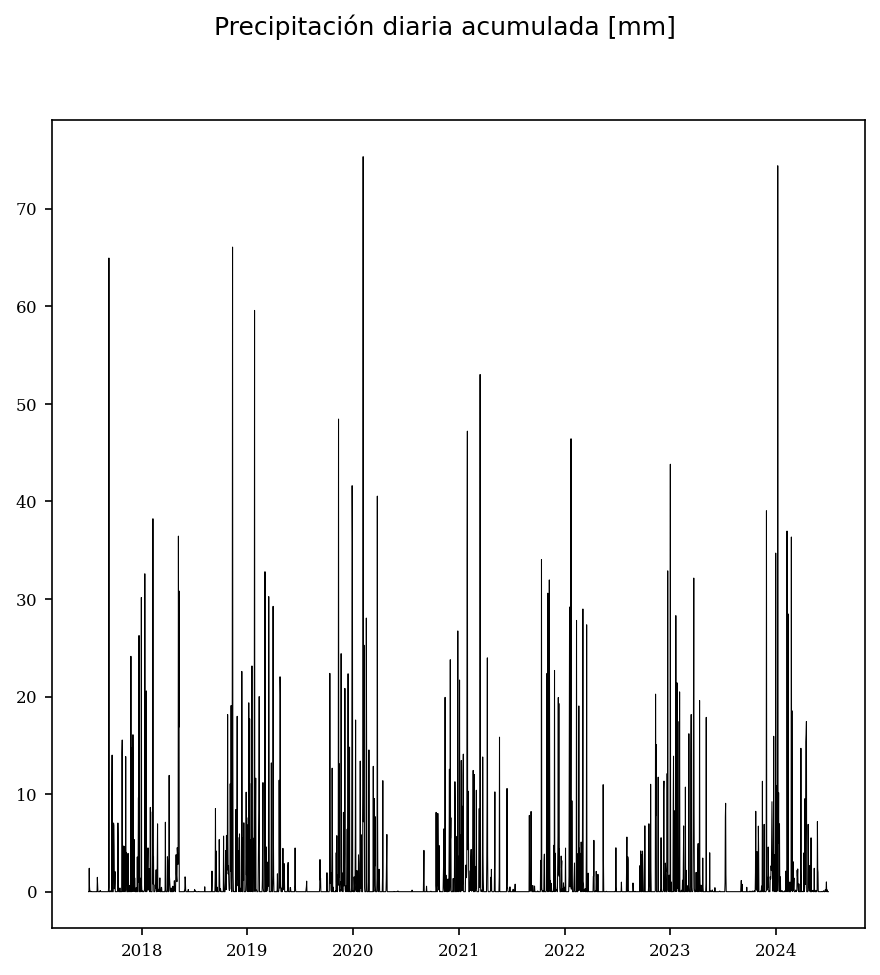

In [49]:
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    fig, axs = plt.subplots(figsize=(7,7), dpi= 150)
fig.suptitle('Precipitación diaria acumulada [mm]')
Anio_inicialC=2017
mask = (df_t > pd.Timestamp(Anio_inicialC,7,1)) & (df_t <= pd.Timestamp(Anio_inicialC+7,6,30))
axs.plot(df_t[mask], lluvia[mask], linewidth =.50)
plt.show()

## Modelado empleando Gauss
Determinación de los parámetros $\mu$ y $\sigma$.

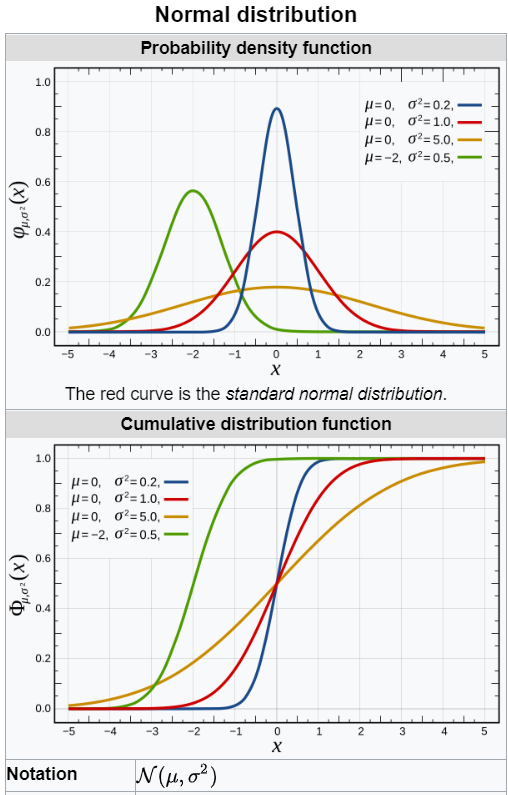

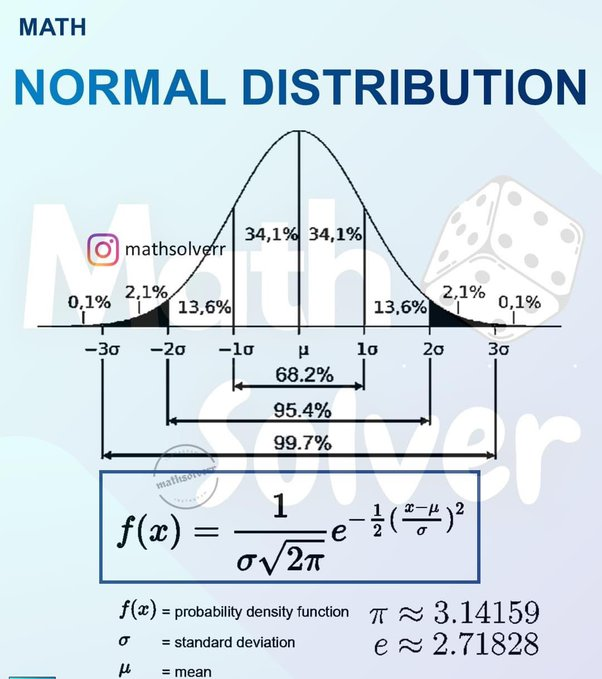

## Datos de la Central Met del CAPE
Modelado Gaussiano.

Year 2021: 384.0mm of H2)
Year 2022: 516.0mm of H2)
Year 2023: 226.0mm of H2)


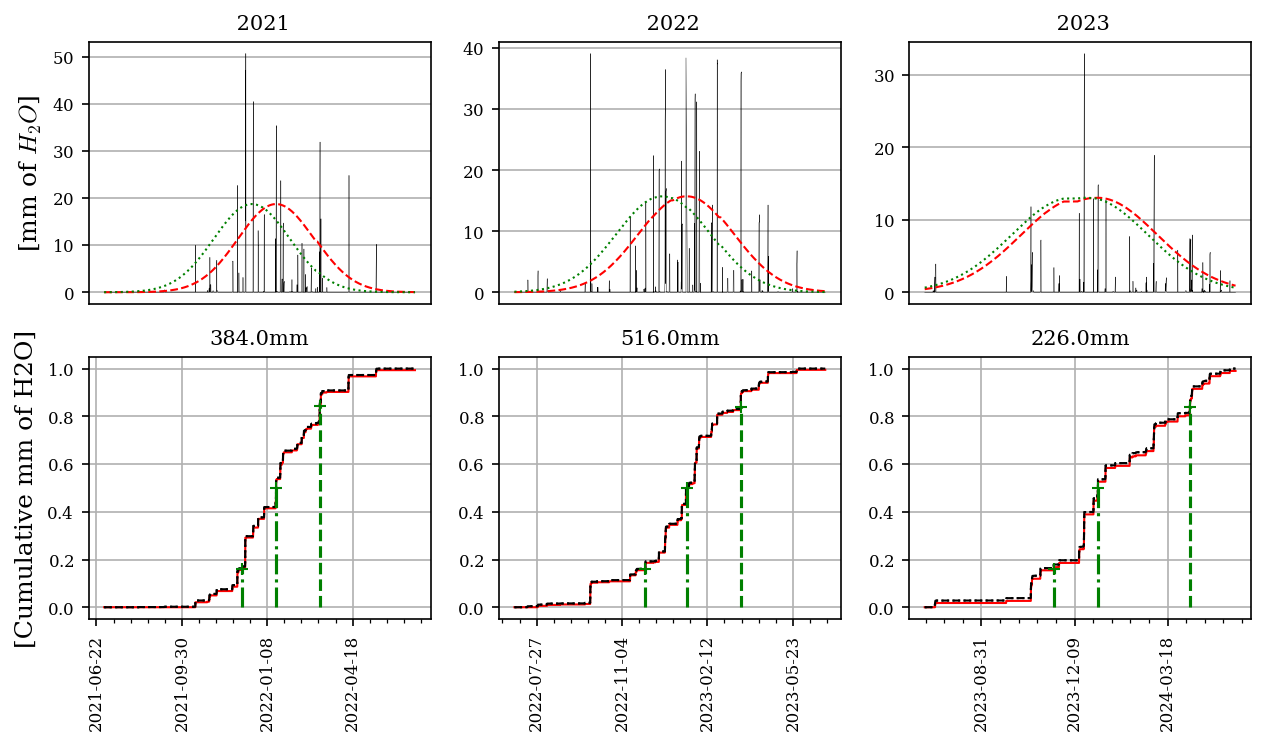

In [44]:
# p(k)=(T1*(P(k)-P(k-1))+T2*p(k-1)+P(k))/(T2+1) #k =2, 3, ...
Anio_inicial_A=Anio_inicial
Anio_inicial=2021
NA=6-3 #Número de años. Desde Anio_inicial hasta Anio_inicial+NA
# V_mat = np.empty([6, NA])  #NA es el numero de años desde el 2016 =Anio_inicial.
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(2,NA,figsize=(10,5), dpi= 150)
f1=True;f2=True
t_anio = np.empty(NA)
# plt.plot(df_CAPE['Fecha '],df_CAPE['Precipitacion_Acum._Diaria [mm]'],color='r', linewidth=.1)
df_CAPE['Precipitacion [mm]']=df_CAPE['Precipitacion [mm]'].fillna(0)
# v1=v.fillna(0)
for i in range(NA):
  # mask = (df_t > pd.Timestamp(Anio_inicial+i,7,1)) & (df_t <= pd.Timestamp(Anio_inicial+i+1,6,30))
  mask = (df_CAPE['Fecha '] > pd.Timestamp(Anio_inicial+i,7,1)) & (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
  s_anio=(df_CAPE['Fecha '] == pd.Timestamp(Anio_inicial+i,7,1)) #inicio de anio hidrologico
  m_solst = (df_CAPE['Fecha '] == pd.Timestamp(Anio_inicial+i,12,21)) # Solsticio
  v_integrada=df_CAPE['Precipitacion_Acum._Diaria [mm]'][mask]
  v =df_CAPE['Precipitacion [mm]'][mask]
  t_Y=df_CAPE['Fecha '][mask]
  F_solst=df_CAPE['Fecha '][m_solst]
  I_Anio=df_CAPE['Fecha '][s_anio]
  mu_F_solst=173+30 #Es la fecha de solsticio de verano más 30 días, el centro de las lluvias
  mu_F_solst=F_solst.index[0]-I_Anio.index[0]   # t_anio[i]=(t_Y[0].astype(object).year) #Almacena el año
  t_anio[i]=t_Y.iloc[0].year
  v_mask=np.isfinite(v.values)
  P=np.cumsum(v[v_mask].values)
  # P=np.cumsum(v.values)
  P_max=P[-1]
  T1=0*1e-1
  T2=2e0
  p=np.array(range(len(P)))
  p[0]=0.
  for i1 in range(len(P)-1):
    k=i1+1
    p[k]=(T1*(P[k]-P[k-1])+T2*p[k-1]+P[k])/(T2+1)
  axs[0,i].set_title(' '+str(Anio_inicial+i), fontsize=10)
  # mask=df['PRECTOTCORR']>0
  # lluvia=df['PRECTOTCORR'][mask]
  axs[0,i].plot(df_CAPE['Fecha '][mask], df_CAPE['Precipitacion_Acum._Diaria [mm]'][mask], linewidth =.20)
  axs[0,i].axes.get_xaxis().set_visible(False) #Evita imprimir los valores de los ejes
  if f1:
    axs[0,i].set_ylabel('[mm of $H_2O$]',rotation=90, fontsize=12)
    f1= False
  axs[0,i].grid()
  h=np.sum(v[v_mask].values) #Lluvia acumulada anual
  axs[1,i].set_title(str(np.round(h))+'mm', fontsize=10)
  axs[1,i].plot( df_CAPE['Fecha '][mask], p/h, linewidth =1.0, color = 'red')
  axs[1,i].plot( df_CAPE['Fecha '][mask], np.cumsum(v)/h, linewidth =1.0, color = 'black')
  axs[1,i].xaxis.set_major_locator(ticker.AutoLocator())
  axs[1,i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
  if f2:
    axs[1,i].set_ylabel('[Cumulative mm of H2O]',rotation=90, fontsize=12)
    f2= False
  # axs[1,i].locator_params(axis='y', nbins=7)
  axs[1,i].locator_params(axis='x', nbins=5)
  # # plt.xlabel('Distancia [Km] %d'+ % entries, fontproperties=font_manager.FontProperties(size=10))
  # axs[1,i].set_title('D.t.: '+str(int(h))+ ' Km', fontsize=10); # fig.suptitle('Distancia [Km]')
  axs[1,i].grid()
  axs[1,i].tick_params(axis='x', labelrotation=90)
  temp=np.abs(p /h-.5)
  lugar=np.where(temp==np.min(temp))
  mu_m=lugar[0]
  mu_v=p[lugar[0]]
  # t_mu_=t_Y[lugar[0][0]]
  t_mu_= t_Y.iloc[lugar[0][0]]
  temp =np.abs(p/h - .1587)
  mu_i =np.where(temp==np.min(temp,axis=0))[0]
  mu_= lugar[0] - mu_i[0]
  sigma_1 = mu_m[0]-mu_i[0]
  temp =np.abs(p/h- .8413)
  # mu_s =np.where(temp==np.min(temp))
  mu_s =np.where(temp==np.min(temp,axis=0))[0]
  # t_mu_s =t_Y[mu_s[0]]
  t_mu_s = t_Y.iloc[mu_s[0]]
  sigma_2 =mu_s[0]-mu_m[0]
  sigma_ =(mu_s[0]-mu_[0])
  sigma =.5*(mu_s[0]-mu_i[0]) #;%     S_D=.5*(t_68-t_34);
  sigma_m =(mu_[0]-mu_i[0])
  pg=np.array(range(len(P)),dtype=float)
  pg_sols=np.array(range(len(P)),dtype=float)
  hh=0.
  for kk in range(len(P)):
    hh=hh+1.
    pg[kk] = (200*10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_m[0])/sigma)**2)
    pg_sols[kk] = (200*10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_F_solst)/sigma)**2)
  axs[0,i].plot( t_Y,pg, linewidth =1.0 , color = 'red')
  axs[0,i].plot( t_Y,pg_sols, linewidth =1.0 , color = 'green')
  axs[1,i].plot(t_Y,P/h, linewidth =1.0 , color = 'black')
  # Agrega los puntos importantes de la distribucion Gaussiana a cada probabilidad acumulada
  timeseries_data={
        "Date": [t_mu_, t_mu_, t_mu_s, t_mu_s, t_Y.iloc[mu_i[0]], t_Y.iloc[mu_i[0]]],
        "Result": [0 , mu_v[0], 0 , p[mu_s[0]], 0, p[mu_i[0]] ]
  }
  dfc = pd.DataFrame(timeseries_data, columns=['Date', 'Result'])
  for ii in range(0, 6, 2):
     axs[1,i].plot(dfc['Date'][ii:ii+2], dfc['Result'][ii:ii+2]/h, color='green')
     axs[1,i].plot(dfc['Date'][ii+1:ii+2], dfc['Result'][ii+1:ii+2]/h, marker ='+', color='green')
  print('Year ' + str(int(Anio_inicial+i)) + ': ' + str(np.round(h))+ 'mm of H2)') #Anio_inicial=2016
Anio_inicial=Anio_inicial_A
plt.show()

## Datos Power Merra Nasa
Modelado Gaussiano.

Year 1984: 825.0mm
Year 1985: 817.0mm
Year 1986: 928.0mm


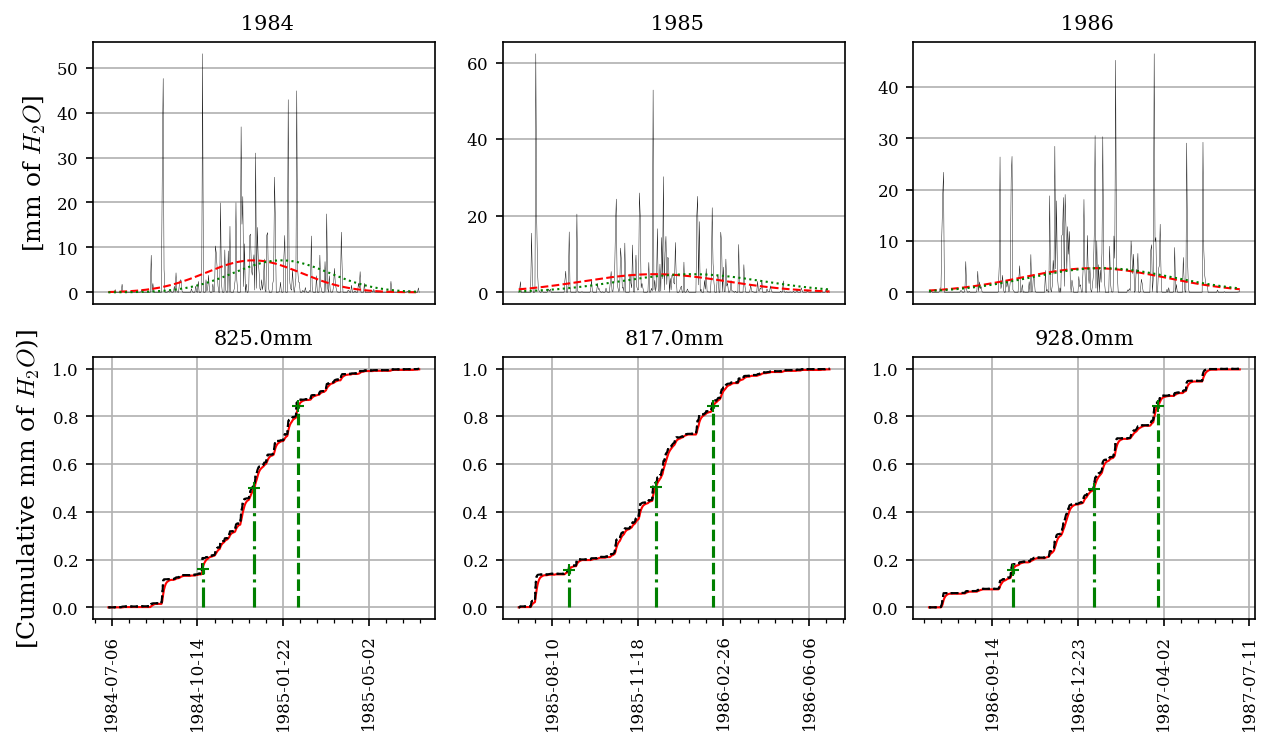

In [50]:
Anio_inicial_A=Anio_inicial
Anio_inicial=1981+3
NA=6-3 #Número de años. Desde Anio_inicial hasta Anio_inicial+NA
V_mat = np.empty([6, NA])  #NA es el numero de años desde el 2016 =Anio_inicial.
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
#with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(2,NA,figsize=(10,5), dpi= 150)
f1=True;f2=True
t_anio = np.empty(NA)
for i in range(NA):
  mask = (df_t > pd.Timestamp(Anio_inicial+i,7,1)) & (df_t <= pd.Timestamp(Anio_inicial+i+1,6,30))
  m_solst = (df_t == pd.Timestamp(Anio_inicial+i,12,21)) # Solsticio
  v=lluvia[mask]
  t_Y=df_t[mask]
  F_solst=df_t[m_solst]
  mu_F_solst=173+30 #Es la fecha de solsticio de verano más 30 días, el centro de las lluvias
  t_anio[i]=(t_Y[0].astype(object).year) #Almacena el año
  P=np.cumsum(v)
  P_max=P[-1]
  T1=0*1e-1
  T2=2e0
  p=np.array(range(len(P)))
  p[0]=0.
  for i1 in range(len(P)-1):
    k=i1+1
    p[k]=(T1*(P[k]-P[k-1])+T2*p[k-1]+P[k])/(T2+1)
  axs[0,i].set_title(' '+str(Anio_inicial+i), fontsize=10)
  # mask=df['PRECTOTCORR']>0
  # lluvia=df['PRECTOTCORR'][mask]
  axs[0,i].plot(df_t[mask], lluvia[mask], linewidth =.20)
  axs[0,i].axes.get_xaxis().set_visible(False) #Evita imprimir los valores de los ejes
  if f1:
    axs[0,i].set_ylabel('[mm of $H_2O$]',rotation=90, fontsize=12)
    f1= False
  axs[0,i].grid()
  h=np.sum(lluvia[mask]) #Lluvia acumulada anual
  axs[1,i].set_title(str(np.round(h))+'mm', fontsize=10)
  axs[1,i].plot( df_t[mask], p/h, linewidth =1.0, color = 'red')
  axs[1,i].plot( df_t[mask], np.cumsum(v)/h, linewidth =1.0, color = 'black')
  axs[1,i].xaxis.set_major_locator(ticker.AutoLocator())
  axs[1,i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
  if f2:
    axs[1,i].set_ylabel('[Cumulative mm of $H_2O$)]',rotation=90, fontsize=12)
    f2= False
  # axs[1,i].locator_params(axis='y', nbins=7)
  axs[1,i].locator_params(axis='x', nbins=5)
  # # plt.xlabel('Distancia [Km] %d'+ % entries, fontproperties=font_manager.FontProperties(size=10))
  # axs[1,i].set_title('D.t.: '+str(int(h))+ ' Km', fontsize=10); # fig.suptitle('Distancia [Km]')
  axs[1,i].grid()
  axs[1,i].tick_params(axis='x', labelrotation=90)
  temp=np.abs(p /h-.5)
  lugar=np.where(temp==np.min(temp))
  mu_m=lugar[0]
  mu_v=p[lugar[0]]
  t_mu_=t_Y[lugar[0]]
  temp =np.abs(p/h - .1587)
  mu_i =np.where(temp==np.min(temp,axis=0))[0]
  mu_= lugar[0] - mu_i[0]
  sigma_1 = mu_m[0]-mu_i[0]
  temp =np.abs(p/h- .8413)
  # mu_s =np.where(temp==np.min(temp))
  mu_s =np.where(temp==np.min(temp,axis=0))[0]
  t_mu_s =t_Y[mu_s[0]]
  sigma_2 =mu_s[0]-mu_m[0]
  sigma_ =(mu_s[0]-mu_[0])
  sigma =.5*(mu_s[0]-mu_i[0]) #;%     S_D=.5*(t_68-t_34);
  sigma_m =(mu_[0]-mu_i[0])
  pg=np.array(range(len(P)),dtype=float)
  pg_sols=np.array(range(len(P)),dtype=float)
  hh=0.
  for kk in range(len(P)):
    hh=hh+1.
    pg[kk] = (10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_m[0])/sigma)**2)
    pg_sols[kk] = (10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_F_solst)/sigma)**2)
  axs[0,i].plot( t_Y,pg, linewidth =1.0 , color = 'red')
  axs[0,i].plot( t_Y,pg_sols, linewidth =1.0 , color = 'green')
  axs[1,i].plot(t_Y,P/h, linewidth =1.0 , color = 'black')
  # Agrega los puntos importantes de la distribucion Gaussiana a cada probabilidad acumulada
  timeseries_data={
        "Date": [t_mu_[0], t_mu_[0], t_mu_s, t_mu_s, t_Y[mu_i][0], t_Y[mu_i][0]],
        "Result": [0 , mu_v[0], 0 , p[mu_s], 0, p[mu_i[0]] ]
  }
  dfc = pd.DataFrame(timeseries_data, columns=['Date', 'Result'])
  for ii in range(0, 6, 2):
     axs[1,i].plot(dfc['Date'][ii:ii+2], dfc['Result'][ii:ii+2]/h, color='green')
     axs[1,i].plot(dfc['Date'][ii+1:ii+2], dfc['Result'][ii+1:ii+2]/h, marker ='+', color='green')
  print('Year ' + str(int(Anio_inicial+i)) + ': ' + str(np.round(h))+ 'mm') #Anio_inicial=2016
Anio_inicial=Anio_inicial_A
plt.show()

Year 2021: 622.0mm
Year 2022: 591.0mm
Year 2023: 627.0mm


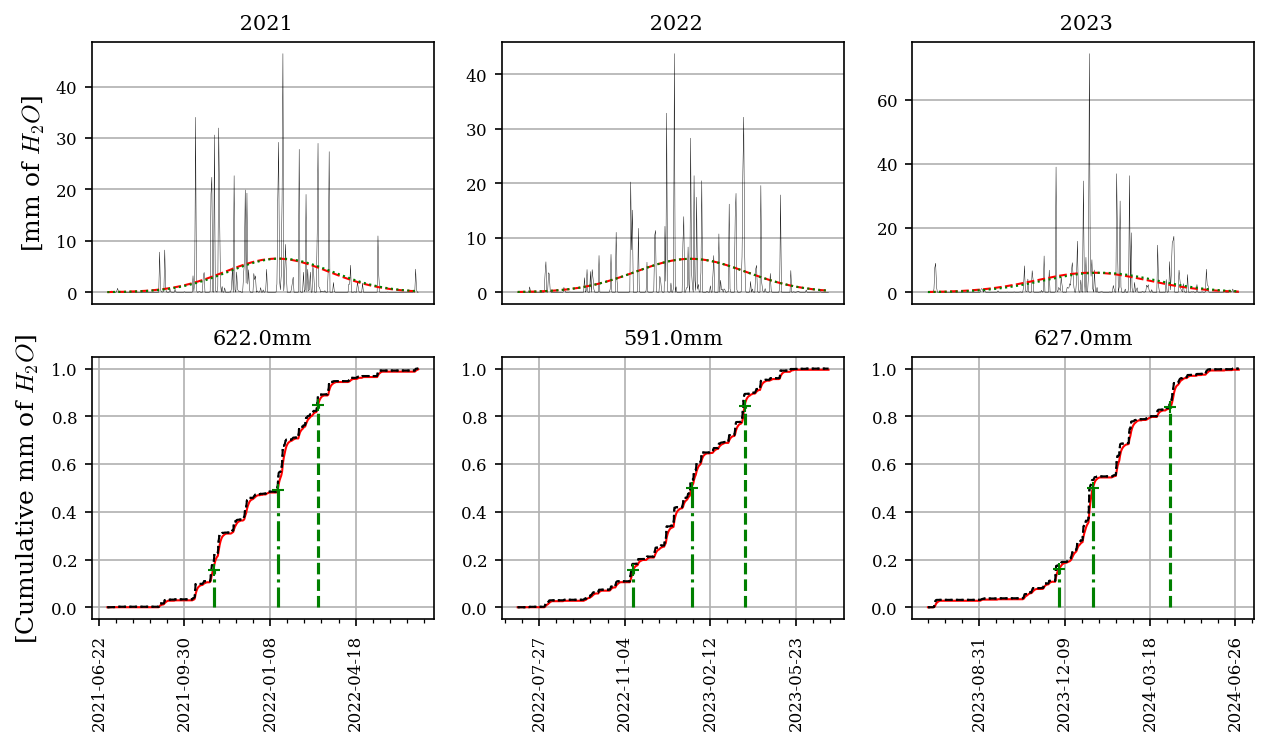

In [51]:
# p(k)=(T1*(P(k)-P(k-1))+T2*p(k-1)+P(k))/(T2+1) #k =2, 3, ...
Anio_inicial_A=Anio_inicial
Anio_inicial=2021
NA=6-3 #Número de años. Desde Anio_inicial hasta Anio_inicial+NA
V_mat = np.empty([6, NA])  #NA es el numero de años desde el 2016 =Anio_inicial.
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
  fig, axs = plt.subplots(2,NA,figsize=(10,5), dpi= 150)
f1=True;f2=True
t_anio = np.empty(NA)
for i in range(NA):
  mask = (df_t > pd.Timestamp(Anio_inicial+i,7,1)) & (df_t <= pd.Timestamp(Anio_inicial+i+1,6,30))
  m_solst = (df_t == pd.Timestamp(Anio_inicial+i,12,21)) # Solsticio
  v=lluvia[mask]
  t_Y=df_t[mask]
  F_solst=df_t[m_solst]
  mu_F_solst=173+30 #Es la fecha de solsticio de verano más 30 días, el centro de las lluvias
  t_anio[i]=(t_Y[0].astype(object).year) #Almacena el año
  P=np.cumsum(v)
  P_max=P[-1]
  T1=0*1e-1
  T2=2e0
  p=np.array(range(len(P)))
  p[0]=0.
  for i1 in range(len(P)-1):
    k=i1+1
    p[k]=(T1*(P[k]-P[k-1])+T2*p[k-1]+P[k])/(T2+1)
  axs[0,i].set_title(' '+str(Anio_inicial+i), fontsize=10)
  # mask=df['PRECTOTCORR']>0
  # lluvia=df['PRECTOTCORR'][mask]
  axs[0,i].plot(df_t[mask], lluvia[mask], linewidth =.20)
  axs[0,i].axes.get_xaxis().set_visible(False) #Evita imprimir los valores de los ejes
  if f1:
    axs[0,i].set_ylabel('[mm of $H_2O$]',rotation=90, fontsize=12)
    f1= False
  axs[0,i].grid()
  h=np.sum(lluvia[mask]) #Lluvia acumulada anual
  axs[1,i].set_title(str(np.round(h))+'mm', fontsize=10)
  axs[1,i].plot( df_t[mask], p/h, linewidth =1.0, color = 'red')
  axs[1,i].plot( df_t[mask], np.cumsum(v)/h, linewidth =1.0, color = 'black')
  axs[1,i].xaxis.set_major_locator(ticker.AutoLocator())
  axs[1,i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
  if f2:
    axs[1,i].set_ylabel('[Cumulative mm of $H_2O$]',rotation=90, fontsize=12)
    f2= False
  # axs[1,i].locator_params(axis='y', nbins=7)
  axs[1,i].locator_params(axis='x', nbins=5)
  # # plt.xlabel('Distancia [Km] %d'+ % entries, fontproperties=font_manager.FontProperties(size=10))
  # axs[1,i].set_title('D.t.: '+str(int(h))+ ' Km', fontsize=10); # fig.suptitle('Distancia [Km]')
  axs[1,i].grid()
  axs[1,i].tick_params(axis='x', labelrotation=90)
  temp=np.abs(p /h-.5)
  lugar=np.where(temp==np.min(temp))
  mu_m=lugar[0]
  mu_v=p[lugar[0]]
  t_mu_=t_Y[lugar[0]]
  temp =np.abs(p/h - .1587)
  mu_i =np.where(temp==np.min(temp,axis=0))[0]
  mu_= lugar[0] - mu_i[0]
  sigma_1 = mu_m[0]-mu_i[0]
  temp =np.abs(p/h- .8413)
  # mu_s =np.where(temp==np.min(temp))
  mu_s =np.where(temp==np.min(temp,axis=0))[0]
  t_mu_s =t_Y[mu_s[0]]
  sigma_2 =mu_s[0]-mu_m[0]
  sigma_ =(mu_s[0]-mu_[0])
  sigma =.5*(mu_s[0]-mu_i[0]) #;%     S_D=.5*(t_68-t_34);
  sigma_m =(mu_[0]-mu_i[0])
  pg=np.array(range(len(P)),dtype=float)
  pg_sols=np.array(range(len(P)),dtype=float)
  hh=0.
  for kk in range(len(P)):
    hh=hh+1.
    pg[kk] = (10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_m[0])/sigma)**2)
    pg_sols[kk] = (10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_F_solst)/sigma)**2)
  axs[0,i].plot( t_Y,pg, linewidth =1.0 , color = 'red')
  axs[0,i].plot( t_Y,pg_sols, linewidth =1.0 , color = 'green')
  axs[1,i].plot(t_Y,P/h, linewidth =1.0 , color = 'black')
  # Agrega los puntos importantes de la distribucion Gaussiana a cada probabilidad acumulada
  timeseries_data={
        "Date": [t_mu_[0], t_mu_[0], t_mu_s, t_mu_s, t_Y[mu_i][0], t_Y[mu_i][0]],
        "Result": [0 , mu_v[0], 0 , p[mu_s], 0, p[mu_i[0]] ]
  }
  dfc = pd.DataFrame(timeseries_data, columns=['Date', 'Result'])
  for ii in range(0, 6, 2):
     axs[1,i].plot(dfc['Date'][ii:ii+2], dfc['Result'][ii:ii+2]/h, color='green')
     axs[1,i].plot(dfc['Date'][ii+1:ii+2], dfc['Result'][ii+1:ii+2]/h, marker ='+', color='green')
  print('Year ' + str(int(Anio_inicial+i)) + ': ' + str(np.round(h))+ 'mm') #Anio_inicial=2016
Anio_inicial=Anio_inicial_A
plt.show()

Ahora se va a emplear todos los datos disponibles, hasta Junio de 2024.

In [52]:
Anio_inicial=df['YEAR'][0]
Anio_final=df['YEAR'][len(df)-1]
NA=Anio_final-Anio_inicial #Número de años. Desde 1981 hasta 2016+NA
V_mat = np.empty([7, NA])  #NA es el numero de años desde el 2016.
# fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
f1=True;f2=True
t_anio = np.empty(NA)
for i in range(NA):
  mask = (df_t > pd.Timestamp(Anio_inicial+i,7,1)) & (df_t <= pd.Timestamp(Anio_inicial+i+1,6,30))
  v=lluvia[mask]
  t_Y=df_t[mask]
  t_anio[i]=(t_Y[0].astype(object).year) #Almacena el año
  P=np.cumsum(v)
  P_max=P[-1]
  T1=0*1e-1
  T2=2e0
  p=np.array(range(len(P)))
  p[0]=0.
  for i1 in range(len(P)-1):
    k=i1+1
    p[k]=(T1*(P[k]-P[k-1])+T2*p[k-1]+P[k])/(T2+1)
  h=np.sum(lluvia[mask]) #Lluvia acumulada anual
  temp=np.abs(p/h-.5)
  lugar=np.where(temp==np.min(temp))
  mu_m=lugar[0]
  mu_v=p[lugar[0]]
  t_mu_=t_Y[lugar[0]]
  temp =np.abs(p/h-.1587)
  mu_i =np.where(temp==np.min(temp))
  mu_i=min(mu_i)
  #mu_= mu_v - mu_i
  # mu_= (mu_v + mu_i)/2
  mu_= lugar[0] - mu_i[0]  
  sigma_1 = mu_m[0]-mu_i[0]
  temp =np.abs(p/h-.8413)
  mu_s =np.where(temp==np.min(temp))
  mu_s=min(mu_s)
  t_mu_s =t_Y[mu_s[0]]
  sigma_2 =mu_s[0]-mu_m[0]
  sigma_ =(mu_s[0]-mu_[0])
  sigma =.5*(mu_s[0]-mu_i[0]) #;%     S_D=.5*(t_68-t_34);
  sigma_m =(mu_[0]-mu_i[0])
  pg=np.array(range(len(P)),dtype=float)
  hh=0.
  for kk in range(len(P)):
    hh=hh+1.
    pg[kk] = (10*10*10/(sigma*2.5066))*math.exp(-.5*((hh-mu_m[0])/sigma)**2)
  temp=[mu_m[0],mu_v[0],pd.to_numeric(t_mu_)[0],sigma,sigma_1,sigma_2,np.round(h)]
  for i1 in range(7):
    V_mat[i1,i]=temp[i1]
  print('Año ' + str(int(Anio_inicial+i)) + ': ' + str(np.round(h))+ 'mm')

Año 1981: 771.0mm
Año 1982: 825.0mm
Año 1983: 942.0mm
Año 1984: 825.0mm
Año 1985: 817.0mm
Año 1986: 928.0mm
Año 1987: 752.0mm
Año 1988: 753.0mm
Año 1989: 795.0mm
Año 1990: 859.0mm
Año 1991: 898.0mm
Año 1992: 1041.0mm
Año 1993: 784.0mm
Año 1994: 631.0mm
Año 1995: 761.0mm
Año 1996: 616.0mm
Año 1997: 1072.0mm
Año 1998: 819.0mm
Año 1999: 1146.0mm
Año 2000: 1088.0mm
Año 2001: 842.0mm
Año 2002: 888.0mm
Año 2003: 670.0mm
Año 2004: 1023.0mm
Año 2005: 759.0mm
Año 2006: 917.0mm
Año 2007: 704.0mm
Año 2008: 603.0mm
Año 2009: 726.0mm
Año 2010: 600.0mm
Año 2011: 635.0mm
Año 2012: 751.0mm
Año 2013: 975.0mm
Año 2014: 1092.0mm
Año 2015: 991.0mm
Año 2016: 699.0mm
Año 2017: 653.0mm
Año 2018: 859.0mm
Año 2019: 736.0mm
Año 2020: 651.0mm
Año 2021: 622.0mm
Año 2022: 591.0mm
Año 2023: 627.0mm


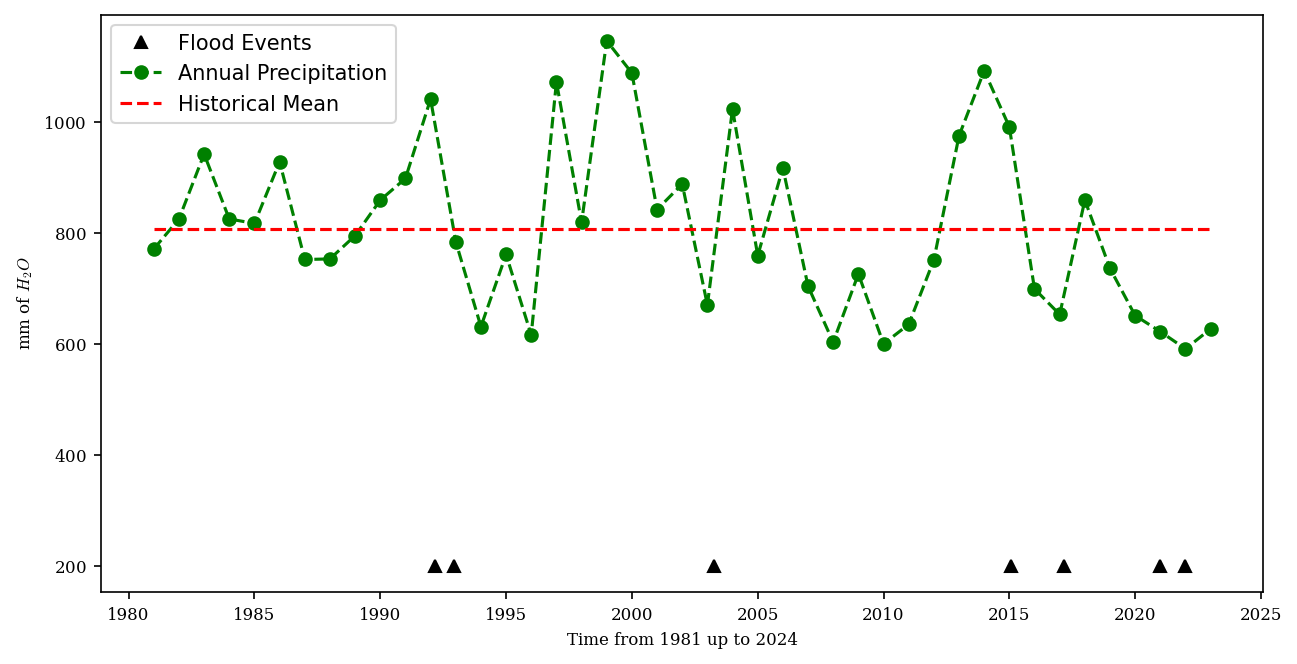

In [54]:
# Media histórica de mm de lámina partiendo del 2000
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    fig, ax1 = plt.subplots(figsize=(10,5), dpi= 150)
datat = pd.DataFrame({'Year': t_anio})
datat['Year'] = pd.to_datetime(datat['Year'], format='%Y')
ax1.plot(df_Eventos['t_Evento'][1:-1], 200*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
ax1.plot((datat['Year']), V_mat[6,:],'--og')
# # Sample data
# datat = pd.DataFrame({'Year': t_anio})
# # Convert the 'Year' column to datetime
# datat['Year'] = pd.to_datetime(datat['Year'], format='%Y')
#    df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')
mua_1=np.mean(V_mat[0,0:14]) #primeros 15 años, desde 2000
ax1.plot(datat['Year'],np.ones_like(t_anio)* np.mean(V_mat[6,:]))
# ax1.set_xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))))
# ax1.set_ylabel('mm totales',rotation=90, fontsize=12)
ax1.legend(['Flood Events','Annual Precipitation','Historical Mean'])
# ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.ylabel('mm of $H_2O$')
plt.xlabel('Time from 1981 up to '+ str(df_t[-1])[0:4])
plt.show()

El análisis consiste en estudiar la distribución de lluvias en el año hidrológico, que empieza el 1º de julio de cada año y termina el 30 de junio del siguiente. Como la distribución ideal es Gaussiana, se analizan los parámetros $\mu$ y $\sigma$ como día de ubicación y cantidad de días de dispersión.

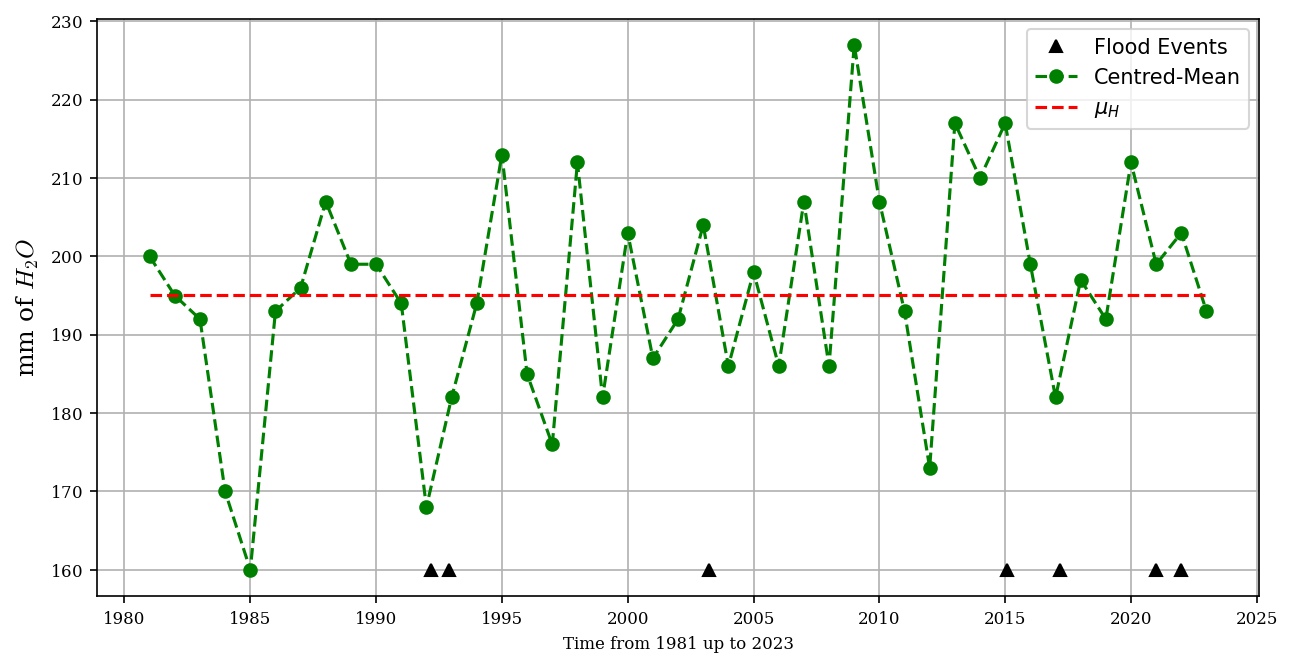

In [55]:
# Analisis de NA años partiendo de 1981
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):    
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    fig, ax1 = plt.subplots(figsize=(10,5), dpi= 150)
datat = pd.DataFrame({'Year': t_anio})
datat['Year'] = pd.to_datetime(datat['Year'], format='%Y')
ax1.plot(df_Eventos['t_Evento'][1:-1],160*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
ax1.plot((datat['Year']), V_mat[0,:],'--og')
# ax1.plot((t_anio), V_mat[0,:],'--og')
mu_1=np.mean(V_mat[0,0:14]) #primeros 15 años, desde 2016
ax1.plot(datat['Year'],np.ones_like(t_anio)* np.mean(V_mat[0,:]))
ax1.set_xlabel('Time from 1981 up to '+ str(int(np.round(t_anio[-1]))))
ax1.set_ylabel('From 1st of July',rotation=90, fontsize=12)
ax1.legend(['Flood Events','Centred-Mean',r'$\mu_H$'])
# ax1.legend([r'Eventos', r'$\sigma_m$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_H$'],loc=2)
# ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
# plt.show()
# # Media histórica de mm de lámina partiendo del 2000
# with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# #with plt.style.context('science'):
# # with plt.style.context('dark_background'):
# # with plt.style.context('seaborn-v0_8-pastel'):
# # with plt.style.context('seaborn-v0_8-poster'):
#     fig, ax1 = plt.subplots(figsize=(10,5), dpi= 150)
# datat = pd.DataFrame({'Year': t_anio})
# datat['Year'] = pd.to_datetime(datat['Year'], format='%Y')
# ax1.plot(df_Eventos['t_Evento'],200*df_Eventos['Eventos'], 'k' , linewidth=0,marker='^')
# ax1.plot((datat['Year']), V_mat[6,:],'--og')
# # # Sample data
# # datat = pd.DataFrame({'Year': t_anio})
# # # Convert the 'Year' column to datetime
# # datat['Year'] = pd.to_datetime(datat['Year'], format='%Y')
# #    df_t[i]= pd.to_datetime( str(df['YEAR'][i])+'-'+str(df['MO'][i])+'-'+str(df['DY'][i])+' '+'00:00:00')
# mua_1=np.mean(V_mat[0,0:14]) #primeros 15 años, desde 2000
# ax1.plot(datat['Year'],np.ones_like(t_anio)* np.mean(V_mat[6,:]))
# # ax1.set_xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))))
# # ax1.set_ylabel('mm totales',rotation=90, fontsize=12)
# # ax1.legend(['mm anual','Media histórica de mm'])
# # ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.grid('True')
plt.ylabel('mm of $H_2O$')
plt.show()

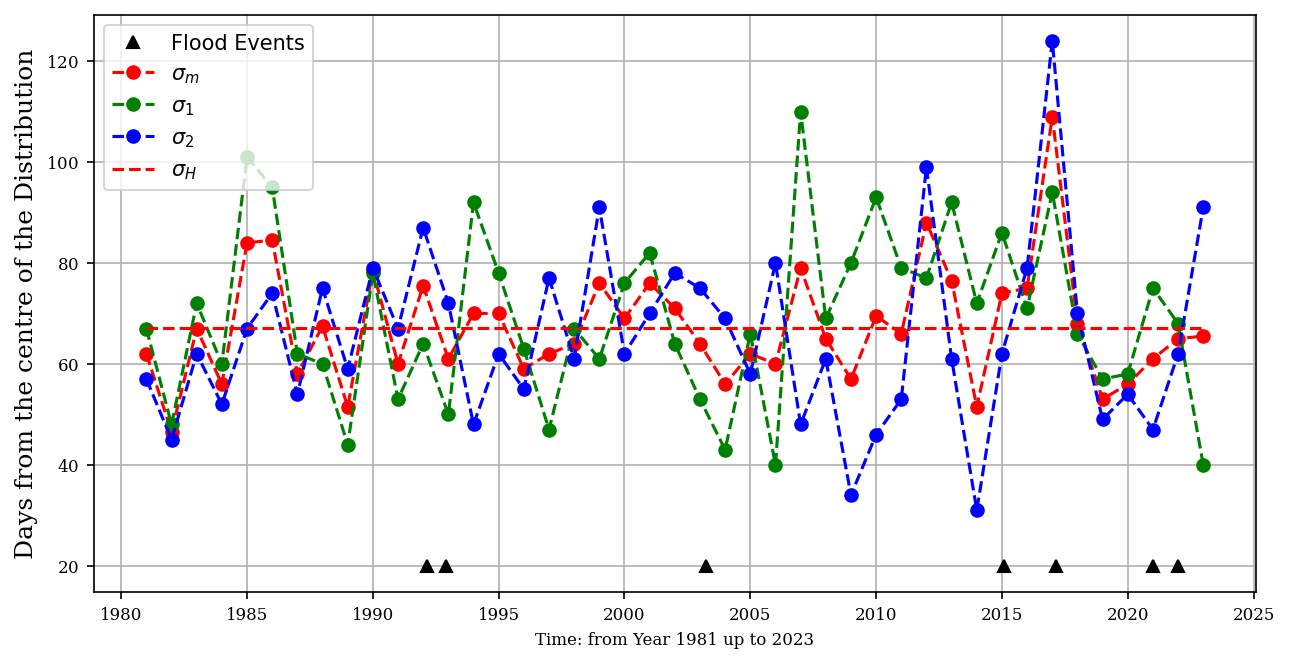

In [56]:
# Analisis de NA años partiendo del 1981
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context(['science','no-latex']):    
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    fig, ax1 = plt.subplots(figsize=(10,5), dpi= 150)
ax1.plot(df_Eventos['t_Evento'][1:-1],20*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
ax1.plot(datat['Year'], V_mat[3,:],'--or')
ax1.plot(datat['Year'], V_mat[4,:],'--og')
ax1.plot(datat['Year'], V_mat[5,:],'--ob')
# ax1.legend(['Eventos','S_m','S_1','S_2'])
ax1.plot(datat['Year'],np.ones_like(t_anio)* np.mean(V_mat[3,:]))
ax1.legend([r'Flood Events', r'$\sigma_m$', r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_H$'],loc=2)
# ax1.plot(datat['Year'],np.ones_like(t_anio)* np.mean(V_mat[0,:]))
ax1.set_xlabel('Time: from Year 1981 up to '+ str(int(np.round(t_anio[-1]))))
ax1.set_ylabel('Days from the centre of the Distribution',rotation=90, fontsize=12)
plt.grid('True')
# ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.show()

## Divergencia Kullback-Leibler (KL)
Kullback–Leibler (KL)

Para evaluar la diferencia entre distribuciones, se emplea la **divergencia Kullback-Leibler**.
Su definición para dos distribuciones P y Q (donde p y q son sus densidades) es

$D_{KL}(P||Q)=\int_{-\infty}^{\infty}p(x)log\frac{p(x)}{q(x)}dx. $

Para el caso de que sean dos distribuciones Gaussianas, se [simplifica](https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians) a $p(x)=\mathcal{N}(\mu_p,\sigma_p)$ y $q(x)=\mathcal{N}(\mu_q,\sigma_q)$

$D_{KL}(P||Q)=log \frac{\sigma_q}{\sigma_p}+\frac{\sigma_p^2+(\mu_q-\mu_p)^2}{2\sigma_q^2}-\frac{1}{2}.$



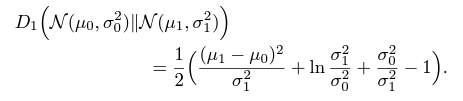

In [57]:
# mu_p y mu_q
mu_p=np.mean(V_mat[0,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
t_x = np.linspace(Anio_inicial,Anio_final-1,Anio_final-Anio_inicial)  # an array with 100 points beteen (and including) 2 and 3
# mu_F_solst=173.
mu_p=mu_F_solst
sigma_p=np.mean(V_mat[3,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
DKL=np.empty(NA)
DKL2=np.empty(NA)
for ii in range(NA):
  mu_q=V_mat[0,ii]   #  Las col de V_mat son así [mu_m[0],mu_v[0],pd.to_numeric(t_mu_),sigma,sigma_1,sigma_2]
  sigma_q=V_mat[4,ii]
  DKL[ii]=np.log((sigma_q/sigma_p)) + (sigma_p**2+(mu_q-mu_p)**2)/(2*sigma_q**2) - .5
  #DKL[ii]=.5*( ((mu_q-mu_p)**2)/(sigma_p**2) + 2*np.log((sigma_q/sigma_p)) + (sigma_p**2)/(sigma_q**2) -1) 
  #Cambiando el sigma_2 que idealmente debería ser igual al 1
  sigma_q=V_mat[5,ii]
  DKL2[ii]=np.log((sigma_q/sigma_p)) + (sigma_p**2+(mu_q-mu_p)**2)/(2*sigma_q**2) - .5

# with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# # with plt.style.context(['science','no-latex']):      
#   fig, axs = plt.subplots(2,1,figsize=(12,10), dpi= 100)
# axs[0].semilogy(t_x, DKL)
# # axs[0].plot(DKL)
# axs[0].set_title(r'Divergencia Kullback-Leibler $\sigma_1$')
# axs[1].semilogy(t_x, DKL2)
# # axs[1].plot(DKL2)
# axs[1].set_title(r'Divergencia Kullback-Leibler $\sigma_2$');
# axs[1].set_xlabel(r'Año hasta '+ str(int(np.round(t_anio[-1]))));
# plt.show()
# columnas = t_x
# df_ = pd.DataFrame(DKL.reshape(1,-1), index=[4], columns = columnas)
# df_1 = pd.DataFrame(DKL2.reshape(1,-1), index=[5], columns = columnas)
# df_KL_T=  df_
# df_KL_T= pd.concat([df_KL_T, df_1] )

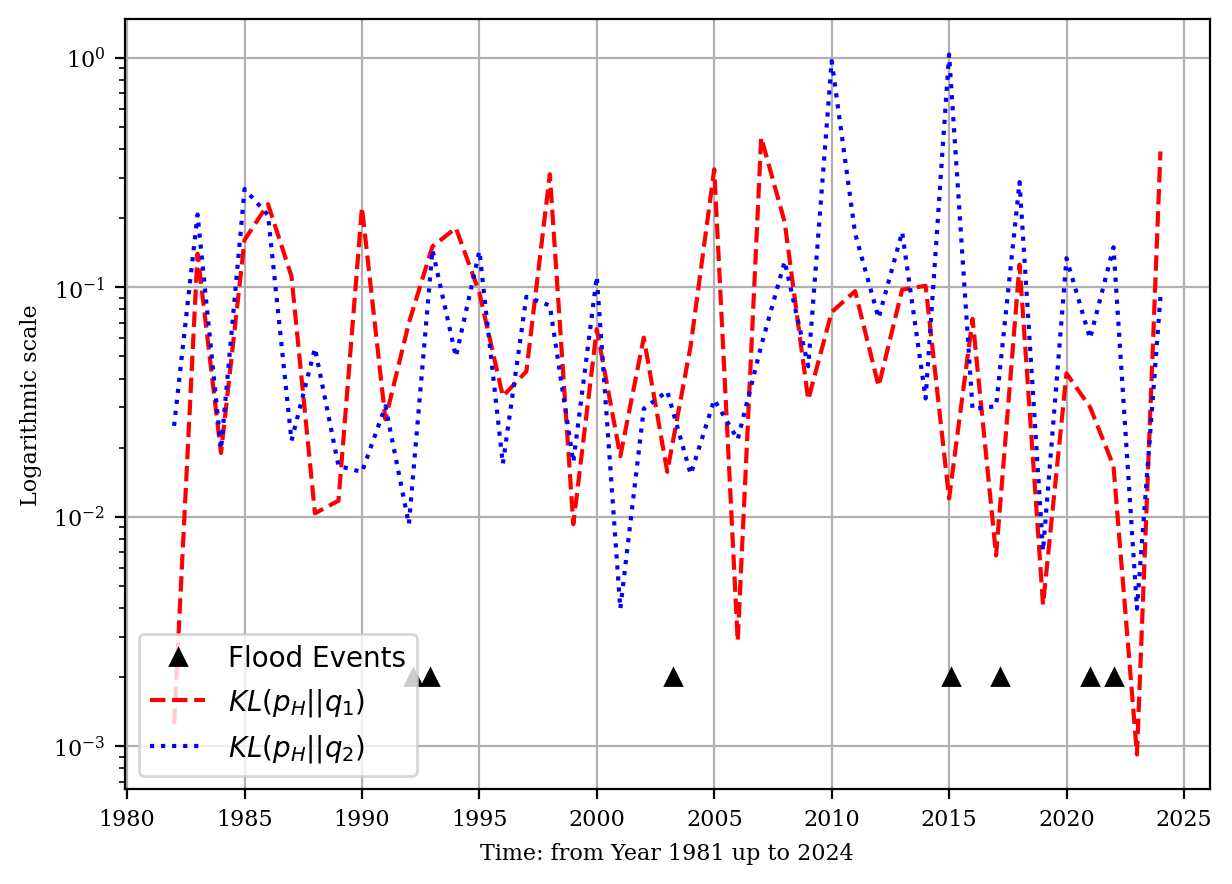

In [58]:
df_KLv=pd.DataFrame({ 't': t_x,'Sigma1': DKL,'Sigma2': DKL2,'Prec_m':V_mat[6,:]}) # Siempre conviene armar un DataFrame para graficar y procesar los datos
#df.set_index('Date', inplace=True)
# datatk = pd.DataFrame({'Year': t_x})
df_KLv['t'] = pd.to_datetime(df_KLv['t'], format='%Y')
# df_KLvt = pd.DataFrame({'t': pd.to_datetime(t_x)})
for i in range(len(df_KLv['t'])):
  # df_KLvt.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
  df_KLv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context(['science','no-latex']):      
  figd, axsd = plt.subplots(1,figsize=(7,5), dpi= 200)
plt.plot(df_Eventos['t_Evento'][1:-1],.00200*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
plt.semilogy(df_KLv['t'], df_KLv['Sigma1'], df_KLv['t'], df_KLv['Sigma2'])

# # axs[1].set_title('Divergencia Kullback-Leibler $\sigma_1$');
# plt.xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))));
plt.xlabel(r'Time: from Year 1981 up to '+ str(int(df.iloc[-1]['YEAR'])))
plt.ylabel(r'Logarithmic scale')
axsd.legend([r'Flood Events',r'$KL(p_H||q_1)$', r'$KL(p_H||q_2)$'],loc='lower left')
#plt.title(r'Divergencia Kullback-Leibler entre $p_H$ y $q_1$, $q_2$')
axsd.grid('True')
plt.show()

In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot'), name='Eventos'))
# fig.add_trace(go.Scatter(x=df_KLv['t'], y=df_KLv['Sigma1'], mode='lines', name='Sigma 1'))
# fig.add_trace(go.Scatter(x=df_KLv['t'], y=df_KLv['Sigma2'], mode='lines', name='Sigma 2'))
# # Customize the layout
# fig.update_layout(title='Kullback-Leibler',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()
df_2Var=df_KLv # ,'Prec_m':V_mat[6,:]
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(    
    go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'),    
    secondary_y=False,   
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma2'], mode='lines', name='KL(p_H||q_2)'),
secondary_y=False,
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma1'], mode='lines', name='KL(p_H||q_1)'),
# axsDB.legend([r'Eventos',r'$DB(p_H,q_1)$', r'$DB(p_H,q_2)$'],loc='upper left')
secondary_y=False,
)
fig.add_trace(
    # go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    go.Scatter(x=df_2Var['t'], y=df_2Var['Prec_m'], mode='lines', name='mm anuales'),
    secondary_y=True,
)
fig.update_layout(title='Kullback-Leibler',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01))
# Set y-axes titles
# fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>mm Anuales</b>", secondary_y=True)
fig.show()

## Distancia del motor de tierra (EMD, Earth Mover's Distance) 

Para dos distribuciones gaussianas, la distancia EMD [distribuciones](https://mathoverflow.net/questions/297892/earth-movers-distance-emd-between-two-multivariate-normals-is-it-negative-def), será

$ EMD \left( \mathcal{N}(m_1, \Sigma_1);\mathcal{N}(m_2, \Sigma_2) \right)^2= \left\Vert m_1-m_2 \right\Vert^2_2 + \left\Vert \Sigma^{\frac{1}{2}}_1 - \Sigma^{\frac{1}{2}}_2  \right\Vert^2_{Frobenius} $

Para el caso de una dimensión, 
$ EMD \left( \mathcal{N}(\mu_1, \sigma_1);\mathcal{N}(\mu_2, \sigma_2) \right)^2= \left\Vert \mu_1-\mu_2 \right\Vert^2_2 +2 \left( \frac{\sigma_1+\sigma_2}{2}  - (\sigma_1 \sigma_2)^{\frac {1}{2}}  \right)$

In [60]:
mu_p=np.mean(V_mat[0,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
t_x = np.linspace(Anio_inicial,Anio_final-1,Anio_final-Anio_inicial)  # an array with 100 points beteen (and including) 2 and 3
# mu_F_solst=173.
mu_p=mu_F_solst
sigma_p=np.mean(V_mat[3,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
EMD=np.empty(NA)
EMD2=np.empty(NA)
for ii in range(NA):
  mu_q=V_mat[0,ii] #sigma=sigma_1 #  Las col de V_mat son así [mu_m[0],mu_v[0],pd.to_numeric(t_mu_),sigma,sigma_1,sigma_2]
  sigma_q=V_mat[4,ii]
  EMD[ii]=((mu_p-mu_q)**2 + 2*((sigma_p+sigma_q)/2 -np.sqrt(sigma_p*sigma_q)))
  #Cambiando el sigma_2 que idealmente debería ser igual al 1
  sigma_q=V_mat[5,ii]  
  EMD2[ii]=((mu_p-mu_q)**2 + 2*((sigma_p+sigma_q)/2 -np.sqrt(sigma_p*sigma_q))) #WKL2[ii]=(sigma_1-sigma_2)**2 + (np.sqrt(sigma_1)-np.sqrt(sigma_2))**2 #WKL2[ii]=np.log((sigma_2/sigma_1)) + (sigma_1**2+(mu_1-mu_m)**2)/(2*sigma_2**2) - .5
# with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# # with plt.style.context(['science','no-latex']):      
#   fig, axs = plt.subplots(2,1,figsize=(12,10), dpi= 100)
# axs[0].semilogy(t_x, EMD)
# # axs[0].plot(DKL)
# axs[0].set_title(r'Distancia de motor de Tierra $\sigma_1$')
# axs[1].semilogy(t_x, EMD2)
# # axs[1].plot(DKL2)
# axs[1].set_title(r'Distancia de motor de Tierra $\sigma_2$')
# axs[1].set_xlabel(r'Año hasta '+ str(int(np.round(t_anio[-1]))))
# plt.show()

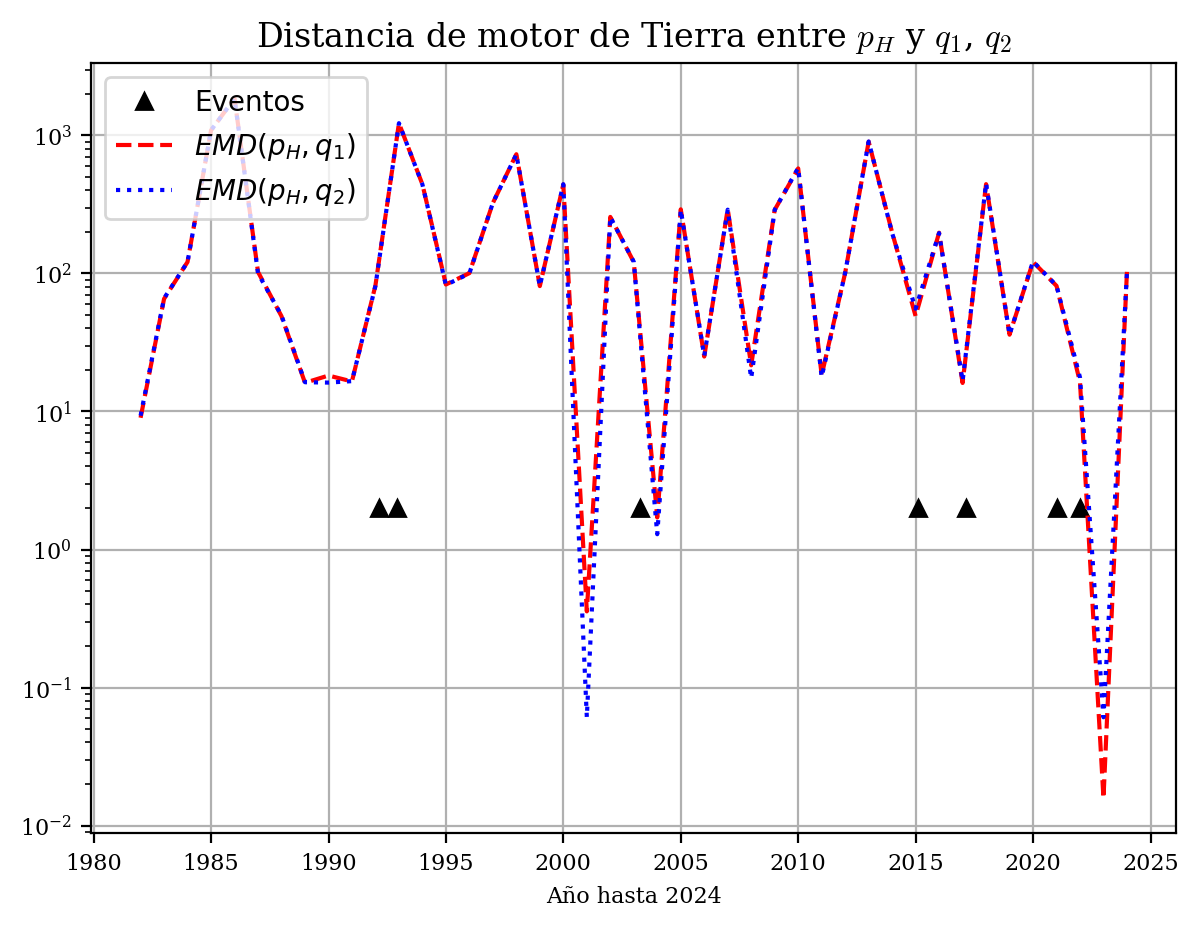

In [61]:
df_EMDv=pd.DataFrame({ 't': t_x,'Sigma1': EMD,'Sigma2': EMD2,'Prec_m':V_mat[6,:]}) # Siempre conviene armar un DataFrame para graficar y procesar los datos
df_EMDv['t'] = pd.to_datetime(df_EMDv['t'], format='%Y')
for i in range(len(df_EMDv['t'])):  
  df_EMDv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):      
  figdd, axsdd = plt.subplots(1,figsize=(7,5), dpi= 200)
#df.set_index('Date', inplace=True)
#plt.plot(df_EMDv['t'], np.sqrt(df_EMDv['Sigma1']), df_EMDv['t'], np.sqrt(df_EMDv['Sigma2'])) #semilogy
plt.plot(df_Eventos['t_Evento'][1:-1],2*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')

plt.semilogy(df_EMDv['t'], df_EMDv['Sigma1'], df_EMDv['t'], df_EMDv['Sigma2'])

# # axs[1].set_title('Divergencia Kullback-Leibler $\sigma_1$');
# plt.xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))));
plt.xlabel(r'Año hasta '+ str(int(df.iloc[-1]['YEAR'])))
# plt.legend([r'Eventos',r'EMD $\sigma_1$', r'EMD $\sigma_2$'],loc=2)

plt.legend([r'Eventos',r'$EMD(p_H,q_1)$', r'$EMD(p_H,q_2)$'],loc='upper left')
# plt.title(r'Divergencia Kullback-Leibler entre $p_H$ y $q_1$, $q_2$')
plt.title(r'Distancia de motor de Tierra entre $p_H$ y $q_1$, $q_2$')
plt.grid('True')
plt.show()

### Resultados EMD

In [62]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot'), name='Eventos'))
# fig.add_trace(go.Scatter(x=df_EMDv['t'], y=df_EMDv['Sigma1'], mode='lines', name='Sigma 1'))
# fig.add_trace(go.Scatter(x=df_EMDv['t'], y=df_EMDv['Sigma2'], mode='lines', name='Sigma 2'))
# #fig.add_trace(go.Scatter(x=df['Date'], y=df['T'], mode='lines', name='Temperatura de suelo [ºC]'))
# # Customize the layout
# fig.update_layout(title='Distancia de motor de Tierra',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()
df_2Var=df_EMDv # ,'Prec_m':V_mat[6,:]
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(    
    go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'),    
    secondary_y=False,   
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma2'], mode='lines', name='EMD(p_H,q_2)'),
secondary_y=False,
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma1'], mode='lines', name='EMD(p_H,q_1)'),
# axsDB.legend([r'Eventos',r'$DB(p_H,q_1)$', r'$DB(p_H,q_2)$'],loc='upper left')
secondary_y=False,
)
fig.add_trace(
    # go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    go.Scatter(x=df_2Var['t'], y=df_2Var['Prec_m'], mode='lines', name='mm anuales'),
    secondary_y=True,
)
fig.update_layout(title='Distancia de motor de Tierra',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01))
# Set y-axes titles
# fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>mm Anuales</b>", secondary_y=True)
fig.show()

## Distancia Bhattacharyya 

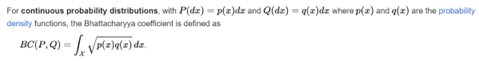

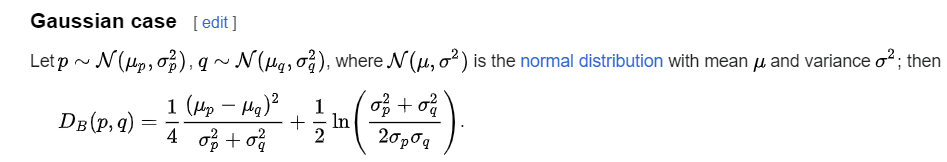

Se supone que son dos distribuciones normales, https://en.wikipedia.org/wiki/Bhattacharyya_distance, $\mathcal{N}(\mu_1, \sigma_1); \mathcal{N}(\mu_2, \sigma_2)$

$ D_B \left( \mathcal{N}(\mu_1, \sigma_1);\mathcal{N}(\mu_2, \sigma_2) \right)= \frac{1}{4}\frac{(\mu_1-\mu_2)^2}{\sigma_1^2+\sigma_2^2 }+\frac{1}{2}ln \left( \frac{\sigma_1^2+\sigma_2^2}{2 \sigma_1 \sigma_2} \right) $


In [63]:
mu_p=np.mean(V_mat[0,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
t_x = np.linspace(Anio_inicial,Anio_final-1,Anio_final-Anio_inicial)  # an array with 100 points beteen (and including) 2 and 3
# mu_F_solst=173.
mu_p=mu_F_solst
sigma_p=np.mean(V_mat[3,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
DB=np.empty(NA)
DB2=np.empty(NA)
for ii in range(NA):
  mu_q=V_mat[0,ii]
  #sigma=sigma_1 #  Las col de V_mat son así [mu_m[0],mu_v[0],pd.to_numeric(t_mu_),sigma,sigma_1,sigma_2]
  sigma_q=V_mat[4,ii]
  DB[ii]= .25*((mu_p-mu_q)**2)/(sigma_p**2+sigma_q**2) + .5*np.log((sigma_p**2+sigma_q**2)/(2*sigma_p*sigma_q))
  #Cambiando el sigma_2 que idealmente debería ser igual al 1
  sigma_q=V_mat[5,ii]  
  DB2[ii]=.25*((mu_p-mu_q)**2)/(sigma_p**2+sigma_q**2) + .5*np.log((sigma_p**2+sigma_q**2)/(2*sigma_p*sigma_q))
# with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# # with plt.style.context(['science','no-latex']):      
#   fig, axs = plt.subplots(2,1,figsize=(12,10), dpi= 100)
# axs[0].semilogy(t_x, DB)
# # axs[0].plot(DKL)
# axs[0].set_title(r'Distancia de Bhattacharyya $\sigma_1$')
# axs[1].semilogy(t_x, DB2)
# # axs[1].plot(DKL2)
# axs[1].set_title(r'Distancia de Bhattacharyya $\sigma_2$');
# axs[1].set_xlabel(r'Año hasta '+ str(int(np.round(t_anio[-1]))));
# plt.show()

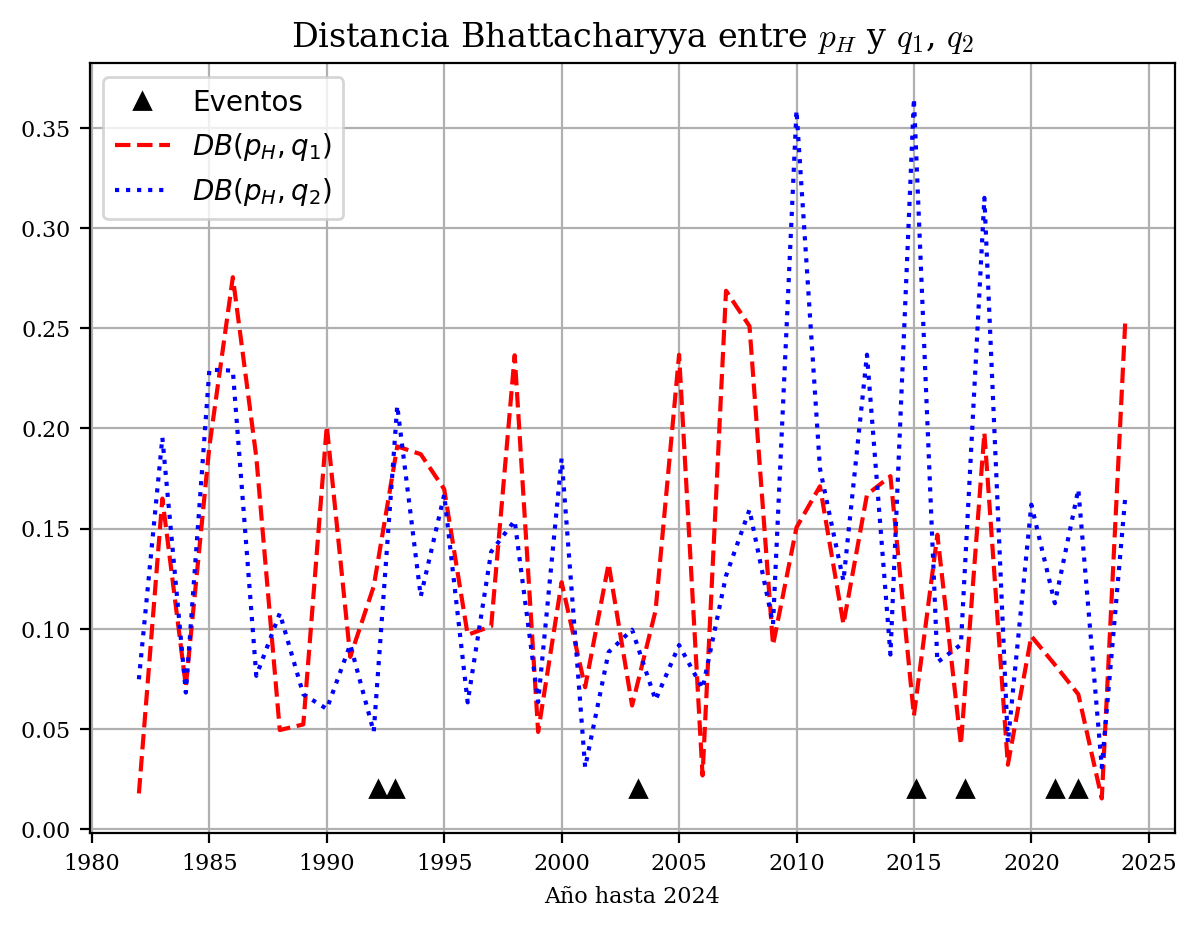

In [64]:
df_DB=pd.DataFrame({ 't': t_x,'Sigma1': DB,'Sigma2': DB2,'Prec_m':V_mat[6,:]}) # Siempre conviene armar un DataFrame para graficar y procesar los datos
df_DB['t'] = pd.to_datetime(df_DB['t'], format='%Y')
for i in range(len(df_DB['t'])):  
  df_DB.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# with plt.style.context(['science','no-latex']):      
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    figDB, axsDB = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
# from datetime import datetime as dt
#df.set_index('Date', inplace=True)
axsDB.plot(df_Eventos['t_Evento'][1:-1],.0200*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
axsDB.plot(df_DB['t'], np.sqrt(df_DB['Sigma1']), df_DB['t'], np.sqrt(df_DB['Sigma2'])) #semilogy
# # axs[1].set_title('Divergencia Kullback-Leibler $\sigma_1$');
# plt.xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))));
axsDB.set_xlabel(r'Año hasta '+ str(int(df.iloc[-1]['YEAR'])))
# axsDB.legend([r'Eventos',r'DB $\sigma_1$', r'DB $\sigma_2$'],loc=2)
axsDB.legend([r'Eventos',r'$DB(p_H,q_1)$', r'$DB(p_H,q_2)$'],loc='upper left')
# plt.title(r'Divergencia Kullback-Leibler entre $p_H$ y $q_1$, $q_2$')
plt.title(r'Distancia Bhattacharyya entre $p_H$ y $q_1$, $q_2$')
# plt.title(r'Distancia Bhattacharyya $\sigma_1$ y $\sigma_2$')
axsDB.grid('True')
plt.show()

### Resultados Bhattacharyya 

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'))
# fig.add_trace(go.Scatter(x=df_DB['t'], y=df_DB['Sigma1'], mode='lines', name='Sigma 1'))
# fig.add_trace(go.Scatter(x=df_DB['t'], y=df_DB['Sigma2'], mode='lines', name='Sigma 2'))
# # fig.add_trace(go.Scatter(x=df_DB['t'], y=df_DB['Prec_m']/6000, mode='lines', name='mm anuales'))
# fig.update_layout(title='Distancia Bhattacharyya',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# fig.show()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(    
    go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'),    
    secondary_y=False,   
)
fig.add_trace(    
go.Scatter(x=df_DB['t'], y=df_DB['Sigma2'], mode='lines', name='DB(p_H,q_2)'),    
secondary_y=False,
)
fig.add_trace(    
go.Scatter(x=df_DB['t'], y=df_DB['Sigma1'], mode='lines', name='DB(p_H,q_1)'),
secondary_y=False,
)
fig.add_trace(
    # go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    go.Scatter(x=df_DB['t'], y=df_DB['Prec_m'], mode='lines', name='mm anuales'),
    secondary_y=True,
)
fig.update_layout(title='Distancia Bhattacharyya',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01))
# Set y-axes titles
# fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>mm Anuales</b>", secondary_y=True)
fig.show()

## Distancia de Wasserstein
La distancia Wasserstein entre dos [distribuciones](https://djalil.chafai.net/blog/2010/04/30/wasserstein-distance-between-two-gaussians/) Gaussianas, será

$ W_2 \left( \mathcal{N}(m_1, \Sigma_1);\mathcal{N}(m_2, \Sigma_2) \right)^2= \left\Vert m_1-m_2 \right\Vert^2_2 + \left\Vert \Sigma^{\frac{1}{2}}_1 - \Sigma^{\frac{1}{2}}_2  \right\Vert^2_{Frobenius} $

Para el caso de una dimensión, 
$ W_2 \left( \mathcal{N}(\mu_1, \sigma_1);\mathcal{N}(\mu_2, \sigma_2) \right)^2= \left\Vert \mu_1-\mu_2 \right\Vert^2_2 + \left\Vert \sigma^{\frac{1}{2}}_1 - \sigma^{\frac{1}{2}}_2  \right\Vert^2_{Frobenius} $

In [157]:
mu_p=np.mean(V_mat[0,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
t_x = np.linspace(Anio_inicial,Anio_final-1,Anio_final-Anio_inicial)  # an array with 100 points beteen (and including) 2 and 3
# mu_F_solst=173.
mu_p=mu_F_solst
sigma_p=np.mean(V_mat[3,0:19]) #primeros 20 años, desde 1981 hasta 2000 REFERENCIA
WKL=np.empty(NA)
WKL2=np.empty(NA)
for ii in range(NA):
  mu_q=V_mat[0,ii]
  #sigma=sigma_1 #  Las col de V_mat son así [mu_m[0],mu_v[0],pd.to_numeric(t_mu_),sigma,sigma_1,sigma_2]
  sigma_q=V_mat[4,ii]
  WKL[ii]=(mu_p-mu_q)**2 + (np.sqrt(sigma_p)-np.sqrt(sigma_q))**2  #  WKL[ii]=np.log((sigma_2/sigma_1)) + (sigma_1**2+(mu_1-mu_m)**2)/(2*sigma_2**2) - .5
  #Cambiando el sigma_2 que idealmente debería ser igual al 1
  sigma_q=V_mat[5,ii]  
  WKL2[ii]=(mu_p-mu_q)**2 + (np.sqrt(sigma_p)-np.sqrt(sigma_q))**2 #WKL2[ii]=np.log((sigma_2/sigma_1)) + (sigma_1**2+(mu_1-mu_m)**2)/(2*sigma_2**2) - .5
# with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
# # with plt.style.context(['science','no-latex']):
#   fig, axs = plt.subplots(2,1,figsize=(12,10), dpi= 100)
# axs[0].semilogy(t_x, np.sqrt(WKL))
# # axs[0].plot(DKL)
# axs[0].set_title(r'Distancia de Wasserstein $\sigma_1$')
# axs[1].semilogy(t_x, np.sqrt(WKL2))
# # axs[1].plot(DKL2)
# axs[1].set_title(r'Distancia de Wasserstein $\sigma_2$');
# axs[1].set_xlabel(r'Año hasta '+ str(int(np.round(t_anio[-1]))));
# plt.show()

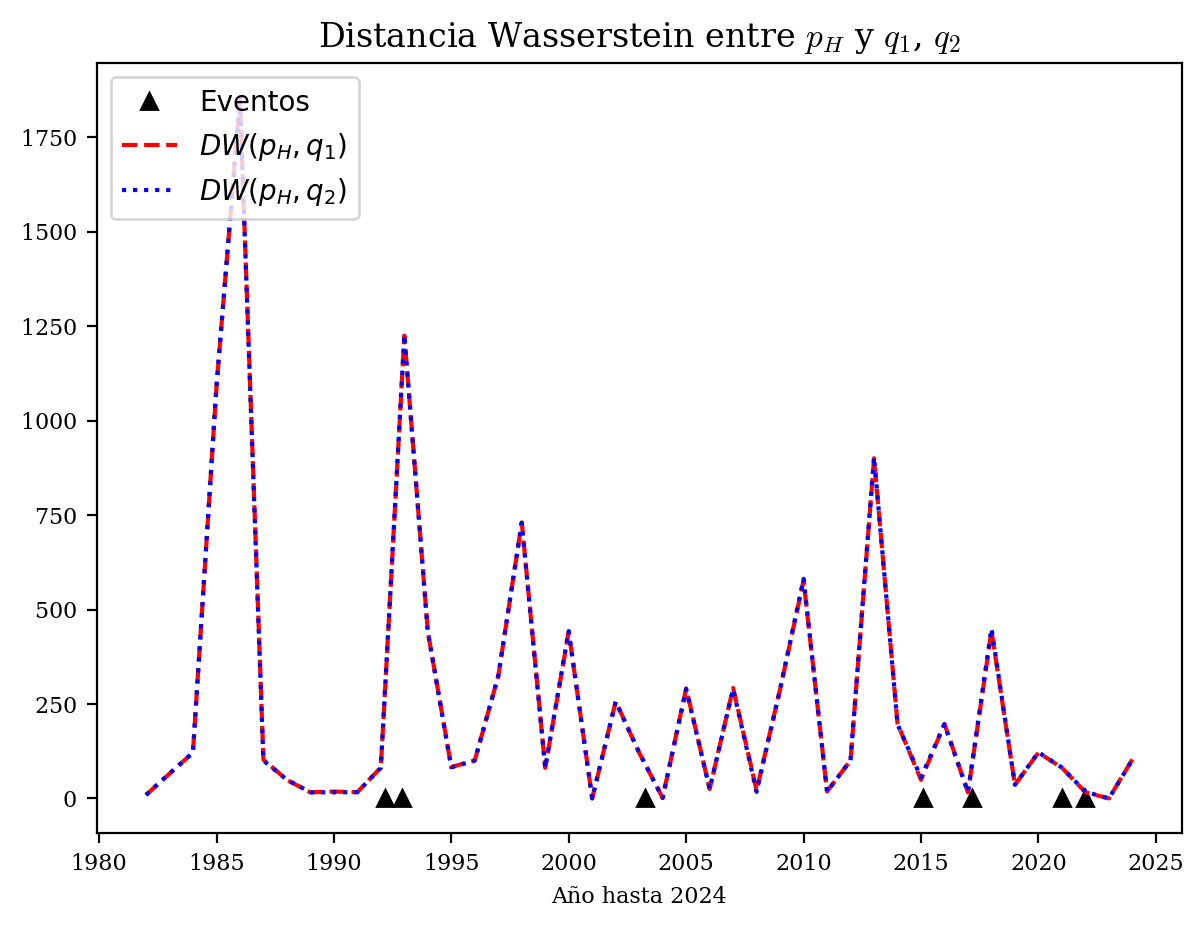

In [158]:
df_DWv=pd.DataFrame({ 't': t_x,'Sigma1': WKL,'Sigma2': WKL2,'Prec_m':V_mat[6,:]}) # Siempre conviene armar un DataFrame para graficar y procesar los datos
df_DWv['t'] = pd.to_datetime(df_DWv['t'], format='%Y')
for i in range(len(df_EMDv['t'])):  
  df_DWv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    figDW, axsDW = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
# from datetime import datetime as dt
#df.set_index('Date', inplace=True)
axsDW.plot(df_Eventos['t_Evento'][1:-1],.00200*df_Eventos['Eventos'][1:-1], 'k' , linewidth=0,marker='^')
axsDW.plot(df_DWv['t'], (df_DWv['Sigma1']), df_DWv['t'], (df_DWv['Sigma2'])) #semilogy
plt.title(r'Distancia Wasserstein $\sigma_1$ y $\sigma_2$')
# # axs[1].set_title('Divergencia Kullback-Leibler $\sigma_1$');
# plt.xlabel('Año hasta '+ str(int(np.round(t_anio[-1]))));
axsDW.set_xlabel(r'Año hasta '+ str(int(df.iloc[-1]['YEAR'])))
# axsDW.legend([r'Eventos',r'W $\sigma_1$', r'W $\sigma_2$'],loc=2)
axsDW.legend([r'Eventos',r'$DW(p_H,q_1)$', r'$DW(p_H,q_2)$'],loc='upper left')
# plt.title(r'Divergencia Kullback-Leibler entre $p_H$ y $q_1$, $q_2$')
plt.title(r'Distancia Wasserstein entre $p_H$ y $q_1$, $q_2$')
plt.show()

In [ ]:
df_DWv

### Resultados Wasserstein

In [69]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'))
# fig.add_trace(go.Scatter(x=df_DWv['t'], y=df_DWv['Sigma1'], mode='lines', name='Sigma 1'))
# fig.add_trace(go.Scatter(x=df_DWv['t'], y=df_DWv['Sigma2'], mode='lines', name='Sigma 2'))
# fig.update_layout(title='Distancia Wasserstein',
#                   xaxis_title='Tiempo [Seg.]',
#                   yaxis_title='Valores',
#                   legend_title='Variables',
#                   showlegend=True)
# # Display the interactive Plotly chart
# fig.show()
# Create figure with secondary y-axis
# df_DB=pd.DataFrame({ 't': t_x,'Sigma1': DB,'Sigma2': DB2,'Prec_m':V_mat[6,:]}) 
# # Siempre conviene armar un DataFrame para graficar y procesar los datos
df_2Var=df_DWv # ,'Prec_m':V_mat[6,:]
fig = make_subplots(specs=[[{"secondary_y": True}]])
# Add traces
fig.add_trace(    
    go.Scatter(x=df_Eventos['t_Evento'][1:-1], y=.00200*df_Eventos['Eventos'][1:-1], mode='markers', marker=dict(size=10, symbol='triangle-up-dot',color='black'), name='Eventos'),    
    secondary_y=False,   
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma2'], mode='lines', name='DW(p_H,q_2)'),
secondary_y=False,
)
fig.add_trace(    
go.Scatter(x=df_2Var['t'], y=df_2Var['Sigma1'], mode='lines', name='DW(p_H,q_1)'),
# axsDB.legend([r'Eventos',r'$DB(p_H,q_1)$', r'$DB(p_H,q_2)$'],loc='upper left')
secondary_y=False,
)
fig.add_trace(
    # go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    go.Scatter(x=df_2Var['t'], y=df_2Var['Prec_m'], mode='lines', name='mm anuales'),
    secondary_y=True,
)
fig.update_layout(title='Distancia Wasserstein',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True,
                  legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01))
# Set y-axes titles
# fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>mm Anuales</b>", secondary_y=True)
fig.show()

# Prediccion empleando python
Sacado de https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1 (cuenta Matlabunc@gmail.com). Está en el GitHub éste: https://github.com/marcopeix/datasciencewithmarco/blob/master/sklearn_time_series.ipynb

In [70]:
import statsmodels.api as sm
# !pip install scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [71]:
df_KLv.tail()

t    Sigma1    Sigma2  Prec_m
38 2019-12-31  0.042107  0.133837   736.0
39 2020-12-31  0.030037  0.059739   651.0
40 2021-12-31  0.016636  0.149307   622.0
41 2022-12-31  0.000921  0.003971   591.0
42 2023-12-31  0.390352  0.090633   627.0

### Data es KL para predecir DATA

In [374]:
# data = sm.datasets.co2.load_pandas().data
data = df_KLv.loc[:,'t':'Sigma2']
# # df.loc[:, 'C':'E']
# fig, ax = plt.subplots(figsize=(16, 11))
# ax.plot(data)
# # ax.legend(loc=2)
# ax.set_xlabel('Time')
# ax.set_ylabel('KL Divergence')
# fig.autofmt_xdate()
# plt.tight_layout()
# plt.show()
# data.tail()


#### p(1)

In [ ]:
data = data.interpolate()
# df = data.copy()
# # df['y'] = df['4'].shift(-1)
# # df.T
# dfT = df.T.transpose()
# # dfT[5]
# dfT['y'] = dfT[4].shift(-1)
# # dfT
# # dfT.shape  (42, 3)
# nt=2
# train = dfT.iloc[:-nt,0:3] #todos, salvo los últimos nt datos
# test = dfT.iloc[42-nt:43,0:3]
# test = test.drop(test.tail(1).index) # Drop last row
# # train = df[:-104]
# # test = df[-104:]
# print(f'Shape of training set: {train.shape}')
# print(f'Shape of test set: {test.shape}')
data

Baseline model: repeat the last observation (Naive)

In [70]:
# test = test.copy()
# test['baseline_pred'] = test[4]

In [376]:
#### Evaluación
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)
# Regresión a un paso con las `n1` entradas
def window_input1(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Sigma1'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Sigma1'].shift(-i)
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
    return df
from sklearn.model_selection import train_test_split #pip install scikit-learn si es que no está
n1=7 #Número de entradas
new_df = window_input1(n1, data) #n1 es cinco, ancho de ventana
# new_df.head(2)
new_df.tail(1)

t    Sigma1    Sigma2       x_1       x_2       x_3       x_4  \
35 2016-12-31  0.006778  0.030299  0.125491  0.004133  0.042107  0.030037   

         x_5       x_6         y  
35  0.016636  0.000921  0.390352

In [133]:
# X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values #n1 es cinco, la long de la lista de nombres
# # X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values #n1 es cinco, la long de la lista de nombres
# # X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4']].values #n1 es cinco, la long de la lista de nombres
# y = new_df['y'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
# baseline_pred = []
# for row in X_test:
#     baseline_pred.append(np.mean(row))
# # plt.plot(y_test)
# # plt.show()

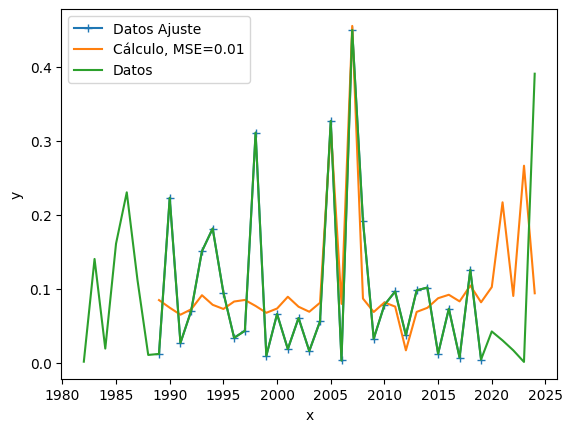

In [378]:
#Escala Lineal SIGMA 1
Anio_Final=2023
nt=2 #Sirve para sincronizar la cantidad de test con las entradas
X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5', 'x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_df['y'].values[:-nt]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
# x = np.arange(500,601,1)
# n = len(x)
# def func_seno(x):
#     return np.sin(x+np.sin(x**2))
# t= func_seno(x)
# x=x.reshape(-1,1)#este reshape se colocan por el error que surgió
# t=t.reshape(-1,1)#este reshape se colocan por el error que surgió
# scaler = MinMaxScaler(feature_range=(-1, 1))
# x_norm = scaler.fit_transform(x)
# t_norm = scaler.fit_transform(t)
# X_train_ = seq_df[X_cols].values[:-nt]
# y_train_ = seq_df[y_cols].values[:-nt]
# X_test_ = seq_df[X_cols].values[-nt:]
# y_test_t = seq_df[y_cols].values[-nt:]
x_norm=X_train
t_norm=y_train
#scaler se hace porque el MLPRregressor funciona mejor con los datos escladados
# x_norm = x_norm.reshape(-1,1)
# t_norm = t_norm.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split(x_norm, t_norm, test_size=0.1)
# y_train = np.ravel(y_train) #se incorporó debido a un error que surgió
regr = MLPRegressor(hidden_layer_sizes=(5,2) , random_state = 10,activation='tanh',solver='lbfgs',max_iter=100000).fit(X_train, y_train)
y_pred_test = regr.predict(new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values)
# y_pred_test = regr.predict(new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values)
# y_pred_test = regr.predict(new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4']].values)
mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
figura = plt.figure()
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(data['t'],data['Sigma1'],label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [379]:
#Escala Lineal SIGMA 2
def window_input2(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Sigma2'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Sigma2'].shift(-i)
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
    return df
new_dfs2 = window_input2(n1, data) #n1 es cinco, ancho de ventana
X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values #n1 es cinco, la long de la lista de nombres
# X = new_df[[5, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values #n1 es cinco, la long de la lista de nombres
# X = new_df[[5, 'x_1', 'x_2', 'x_3', 'x_4']].values #n1 es cinco, la long de la lista de nombres
y = new_dfs2['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
baseline_pred = []
for row in X_test:
    baseline_pred.append(np.mean(row))
# plt.plot(y_test)
# plt.show()

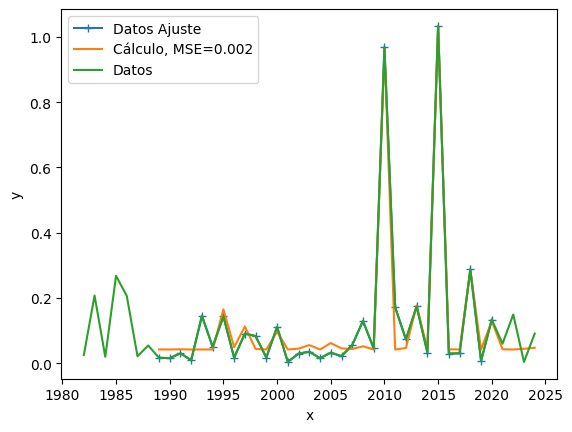

In [380]:
Anio_Final=2023
nt=2 #Sirve para sincronizar la cantidad de test con las entradas
X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5', 'x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_dfs2['y'].values[:-nt]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42, shuffle=False)
x_norm=X_train
t_norm=y_train #scaler se hace porque el MLPRregressor funciona mejor con los datos escalados
regr = MLPRegressor(hidden_layer_sizes=(15,2) , random_state = 100,activation='tanh',solver='lbfgs',max_iter=100000).fit(X_train, y_train)
y_pred_test = regr.predict(new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values)
mean_sq_err = mean_squared_error(new_dfs2['y'].values, y_pred_test)
# mean_sq_total = mean_squared_error((data[4].tail(nt)).values, np.exp(y_pred_test[-2:]))
figura = plt.figure()
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(data['t'],data['Sigma2'],label='Datos')
# plt.plot(data['t'].tail(nt),(data['Sigma2'].tail(nt)),'-o', label='Test real, MSE='+str(np.round(mean_sq_total,3))) # ,label='Test real, MSET='+str(np.round(mean_sq_total,3))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Escala logaritmica $\sigma_1$

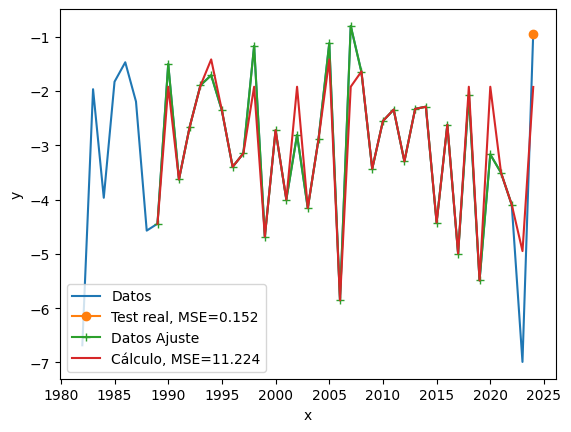

In [394]:
#Escala logaritmica
nt=1 #Valores de Test
X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_df['y'].values[:-nt]
X=np.log(X)
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08*.3, random_state=42, shuffle=False)
x_norm=X_train
t_norm=y_train
# 12.3 
regr = MLPRegressor(hidden_layer_sizes=(7,5) , random_state = 50, activation='tanh', solver='lbfgs',max_iter=40000).fit(X_train, y_train)
# 11.8 regr = MLPRegressor(hidden_layer_sizes=(2,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# no generaliza 11.5 regr = MLPRegressor(hidden_layer_sizes=(2,6) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 12.3 generaliza pero explota mucho regr = MLPRegressor(hidden_layer_sizes=(3,4) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 11.4 generaliza muy poco regr = MLPRegressor(hidden_layer_sizes=(3,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 25.109 generaliza poco regr = MLPRegressor(hidden_layer_sizes=(4,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
y_pred_test = regr.predict(np.log(new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
#desplazar a la izquierda y poner y_pred_test en x_6
mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
mean_sq_total = mean_squared_error((data['Sigma1'].tail(len(y_test))).values, np.exp(y_test))
plt.plot(data['t'],np.log(data['Sigma1']),label='Datos')
plt.plot(data['t'].tail(nt),np.log(data['Sigma1'].tail(nt)),'-o', label='Test real, MSE='+str(np.round(mean_sq_total,3))) # ,label='Test real, MSET='+str(np.round(mean_sq_total,3))
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1),t_norm,'-+',label='Datos Ajuste')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0, 1),y_pred_test,label='Cálculo')
# plt.plot(np.arange(1+Anio_Final-len(y_test)-nt, 1+Anio_Final-nt, 1),y_test,'-o',label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
# plt.plot(data['t'],data['Sigma2'],label='Datos')
# data = df_KL_T.T
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
data['Sigma1']

C:\Users\julia\AppData\Local\Temp\ipykernel_7240\705564971.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



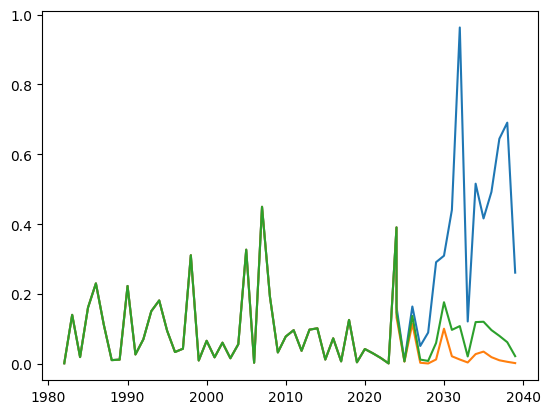

In [395]:
Anio_Final_p=2040
from numpy.random.mtrand import randn
rng = np.random.default_rng(42)
# random_state = np.random.RandomState(seed=1)
# Varianza de ruido Monte Carlo
psi=0.10500
random_state = np.random.RandomState(seed=1) #h=random_state.randn(1)
for hh in range(0,100,1): #7 realizaciones, quedan en df4
  #Escala logaritmica
  data_p=new_df.copy()
  data_pred=data.copy()
  X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:] #n1 es cinco, la long de la lista de nombres
  for i in range(Anio_Final+1,Anio_Final_p,1):
    y_pred_test = regr.predict(np.log(data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
    aux_vec=data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1]
    aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
    aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))    
    df2 = pd.DataFrame({ 't': pd.to_datetime(i, format='%Y'),
                        'Sigma1': [aux_vecd[0]],
                        'x_1':[aux_vecd[1]],
                        'x_2':[aux_vecd[2]],
                        'x_3':[aux_vecd[3]],
                        'x_4':[aux_vecd[4]],
                        'x_5':[aux_vecd[5]],
                        'x_6': [aux_vecd[6]] })
    #pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y')
    dfa=[data_p, df2]
    data_p= pd.concat(dfa)
    df3 = pd.DataFrame({ 't': pd.to_datetime(i, format='%Y'),
                        'Sigma1': [aux_vecd[0]],
                      }, index=[i])
    dfp=[data_pred,df3]
    data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
  if hh == 0:
    df4=pd.DataFrame(data_pred[['Sigma1','t']].copy())    
    df4.rename(columns={'Sigma1': 0}, inplace=True)
  elif hh > 0:
    df4.insert(loc=0, column=hh, value = data_pred['Sigma1'].values)
# data_p.tail(3)
df4.tail(3)
#desplazar a la izquierda y poner y_pred_test en x_6
# mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
df_log=np.log(df4.loc[:,99:0])
NN=20
var_ls1=df_log.var(axis=1)
mean_ls1=df_log.mean(axis=1)
df_mean_ls1=pd.DataFrame({'t': df4['t'],'mean_ls1': mean_ls1,'var_ls1': np.sqrt(var_ls1)},)
plt.plot(df_mean_ls1['t'],np.exp(df_mean_ls1['mean_ls1']+df_mean_ls1['var_ls1'])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'],np.exp(df_mean_ls1['mean_ls1']-df_mean_ls1['var_ls1'])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'], np.exp(df_mean_ls1['mean_ls1']))
plt.show()

###### No cambiar.
Este está andando en Colab.

In [141]:
# ################
# Anio_Final_p=2040
# from numpy.random.mtrand import randn
# rng = np.random.default_rng(42)
# # random_state = np.random.RandomState(seed=1)
# # Varianza de ruido Monte Carlo
# psi=0.000010500
# random_state = np.random.RandomState(seed=1) #h=random_state.randn(1)
# for hh in range(0,100,1): #100 realizaciones, quedan en df4
#   #Escala logaritmica
#   data_p=new_df.copy()
#   data_pred=data.copy()
#   X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
#   for i in range(Anio_Final,Anio_Final_p,1):
#     y_pred_test = regr.predict(np.log(data_p[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
#     aux_vec=data_p[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1];
#     aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
#     aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))
#     df2 = pd.DataFrame({ 4: [aux_vecd[0]],
#                         'x_1':[aux_vecd[1]],
#                         'x_2':[aux_vecd[2]],
#                         'x_3':[aux_vecd[3]],
#                         'x_4':[aux_vecd[4]],
#                         'x_5':[aux_vecd[5]],
#                         'x_6': [aux_vecd[6]] }, index=[i])
#     dfa=[data_p, df2]
#     data_p= pd.concat(dfa)
#     df3 = pd.DataFrame({ 4: [aux_vecd[0]],
#                       }, index=[i])
#     dfp=[data_pred,df3]
#     data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
#   # hh=1
#   if hh == 0:
#     df4=pd.DataFrame(data_pred[4].copy())
#     df4.rename(columns={4: 0}, inplace=True)
#   elif hh > 0:
#     df4.insert(loc=0, column=hh, value = data_pred[4].values)
# # data_p.tail(3)
# df4.tail(3)
# #desplazar a la izquierda y poner y_pred_test en x_6
# # mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
# NN=20
# mean_ls1=df_log.mean(axis=1)
# var_ls1=df_log.var(axis=1)
# plt.plot(np.exp(mean_ls1.tail(NN)+.75*var_ls1.tail(NN)))
# plt.plot(np.exp(mean_ls1.tail(NN)-.75*var_ls1.tail(NN)))
# plt.plot(np.exp(mean_ls1.tail(NN)))

C:\Users\julia\AppData\Local\Temp\ipykernel_7240\1184284707.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



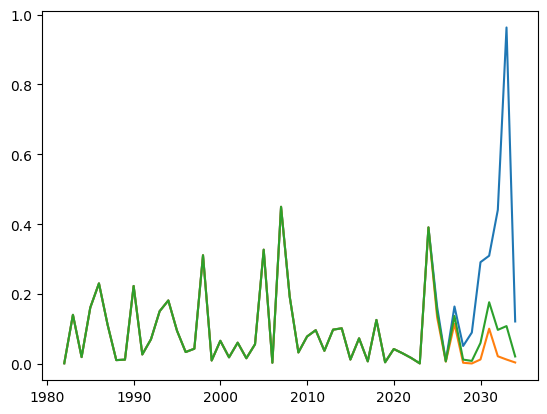

In [396]:
Anio_Final_p=2040
from numpy.random.mtrand import randn
rng = np.random.default_rng(42)
# random_state = np.random.RandomState(seed=1)
# Varianza de ruido Monte Carlo
psi=0.10500
random_state = np.random.RandomState(seed=1) #h=random_state.randn(1)
for hh in range(0,100,1): #100 realizaciones, quedan en df4
  #Escala logaritmica
  data_p=new_df.copy()
  data_pred=data.copy()
  X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
  for i in range(Anio_Final+1,Anio_Final_p,1):
    y_pred_test = regr.predict(np.log(data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
    aux_vec=data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1];
    aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
    aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))
    df2 = pd.DataFrame({ 'Sigma1': [aux_vecd[0]],
                        'x_1':[aux_vecd[1]],
                        'x_2':[aux_vecd[2]],
                        'x_3':[aux_vecd[3]],
                        'x_4':[aux_vecd[4]],
                        'x_5':[aux_vecd[5]],
                        'x_6': [aux_vecd[6]] }, index=[i])
    dfa=[data_p, df2]
    data_p= pd.concat(dfa)
    #df_KLv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
    df3 = pd.DataFrame({ 't': pd.to_datetime(str(int(i))+'-'+str(12) +'-'+str(31) +' '+'00:00:00'),                        
                        'Sigma1': [aux_vecd[0]],
                      }, index=[i])
    dfp=[data_pred,df3]
    data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
  # hh=1
  if hh == 0:
    df4=pd.DataFrame(data_pred[['Sigma1','t']].copy())    
    df4.rename(columns={'Sigma1': 0}, inplace=True)
  elif hh > 0:
    df4.insert(loc=0, column=hh, value = data_pred['Sigma1'].values)
    # DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,
    #  which has poor performance.  
    # Consider joining all columns at once using pd.concat(axis=1) instead. 
    # To get a de-fragmented frame, use `newframe = frame.copy()`
# data_p.tail(3) df4.tail(3)
#desplazar a la izquierda y poner y_pred_test en x_6
# mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
df_log=np.log(df4.loc[:,99:0])
NN=20
var_ls1=df_log.var(axis=1) #Luego le saco la raiz cuadrada para obtener la desv standar
mean_ls1=df_log.mean(axis=1)
df_mean_ls1=pd.DataFrame({'t': df4['t'],'mean_ls1': mean_ls1,'Desv_ls1': np.sqrt(var_ls1)},)
mask = (df4['t'] < pd.Timestamp(2034,7,1))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
plt.plot(df_mean_ls1['t'][mask],np.exp(df_mean_ls1['mean_ls1'][mask]+df_mean_ls1['Desv_ls1'][mask])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'][mask],np.exp(df_mean_ls1['mean_ls1'][mask]-df_mean_ls1['Desv_ls1'][mask])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'][mask], np.exp(df_mean_ls1['mean_ls1'][mask]))
plt.show()

In [ ]:
df_mean_ls1.tail(43)

#### Escala logaritmica $\sigma_2$

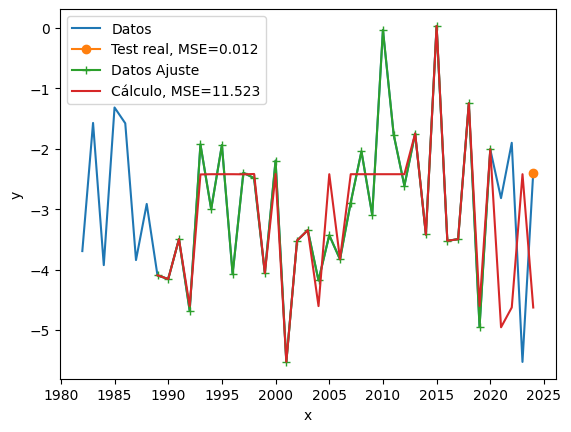

In [397]:
#Escala logaritmica
nt=1 #Valores de Test
X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_dfs2['y'].values[:-nt]
X=np.log(X)
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
x_norm=X_train
t_norm=y_train
# 8.99 generaliza en exceso regr = MLPRegressor(hidden_layer_sizes=(3,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 8.166 generaliza en defecto regr = MLPRegressor(hidden_layer_sizes=(2,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 9.246 generaliza MUY bien, un poco en defecto 
regr = MLPRegressor(hidden_layer_sizes=(4,4) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 8.3 generaliza pero explota mucho regr = MLPRegressor(hidden_layer_sizes=(4,4), random_state = 10, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 11.4 generaliza muy poco regr = MLPRegressor(hidden_layer_sizes=(3,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 25.109 generaliza poco regr = MLPRegressor(hidden_layer_sizes=(4,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
y_pred_test = regr.predict(np.log(new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
#desplazar a la izquierda y poner y_pred_test en x_6
mean_sq_err = mean_squared_error(new_dfs2['y'].values, y_pred_test)
mean_sq_total = mean_squared_error((data['Sigma2'].tail(len(y_test))).values, np.exp(y_test))
plt.plot(data['t'],np.log(data['Sigma2']),label='Datos')
plt.plot(data['t'].tail(nt),np.log(data['Sigma2'].tail(nt)),'-o', label='Test real, MSE='+str(np.round(mean_sq_total,3))) # ,label='Test real, MSET='+str(np.round(mean_sq_total,3))
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1),t_norm,'-+',label='Datos Ajuste')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0, 1),y_pred_test,label='Cálculo')
# plt.plot(np.arange(1+Anio_Final-len(y_test)-nt, 1+Anio_Final-nt, 1),y_test,'-o',label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
# plt.plot(data['t'],data['Sigma2'],label='Datos')
# data = df_KL_T.T
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_7240\22764813.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



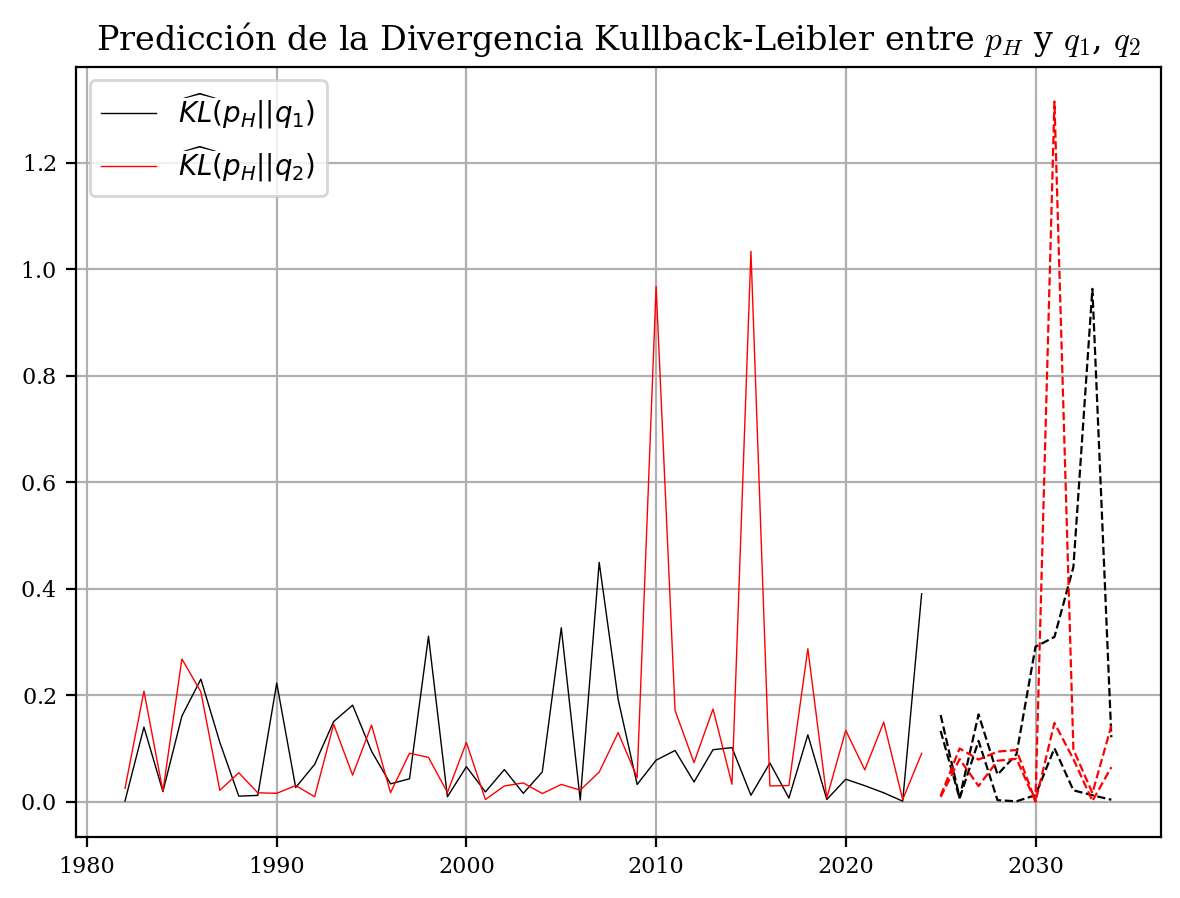

In [398]:
Anio_Final_p=2040
from numpy.random.mtrand import randn
rng = np.random.default_rng(42)
# random_state = np.random.RandomState(seed=1)
# Varianza de ruido Monte Carlo Sigma2
psi=0.10500
random_state = np.random.RandomState(seed=1) #h=random_state.randn(1)
for hh in range(0,100,1): #100 realizaciones, quedan en df4
  #Escala logaritmica
  data_p=new_dfs2.copy()
  data_pred=data.copy()
  X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
  for i in range(Anio_Final+1,Anio_Final_p,1):
    y_pred_test = regr.predict(np.log(data_p[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
    aux_vec=data_p[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1];
    aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
    aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))
    df2 = pd.DataFrame({ 'Sigma2': [aux_vecd[0]],
                        'x_1':[aux_vecd[1]],
                        'x_2':[aux_vecd[2]],
                        'x_3':[aux_vecd[3]],
                        'x_4':[aux_vecd[4]],
                        'x_5':[aux_vecd[5]],
                        'x_6': [aux_vecd[6]] }, index=[i])
    dfa=[data_p, df2]
    data_p= pd.concat(dfa)
    #df_KLv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
    df3 = pd.DataFrame({ 't': pd.to_datetime(str(int(i))+'-'+str(12) +'-'+str(31) +' '+'00:00:00'),                        
                        'Sigma2': [aux_vecd[0]],
                      }, index=[i])
    dfp=[data_pred,df3]
    data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
  # hh=1
  if hh == 0:
    df4=pd.DataFrame(data_pred[['Sigma2','t']].copy())    
    df4.rename(columns={'Sigma2': 0}, inplace=True)
  elif hh > 0:
    df4.insert(loc=0, column=hh, value = data_pred['Sigma2'].values)
    # DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,
    #  which has poor performance.  
    # Consider joining all columns at once using pd.concat(axis=1) instead. 
    # To get a de-fragmented frame, use `newframe = frame.copy()`
# data_p.tail(3) df4.tail(3)
#desplazar a la izquierda y poner y_pred_test en x_6
# mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
df_log=np.log(df4.loc[:,99:0])
NN=20
var_ls2=df_log.var(axis=1) #Luego le saco la raiz cuadrada para obtener la desv standar
mean_ls2=df_log.mean(axis=1)
df_mean_ls2=pd.DataFrame({'t': df4['t'],'mean_ls2': mean_ls2,'Desv_ls2': np.sqrt(var_ls2)},)
mask_i = (df4['t'] < pd.Timestamp(2024,6,30))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
mask = (df4['t'] < pd.Timestamp(2034,7,1))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
mask_p= (df4['t'] <= pd.Timestamp(2034,7,1)) & (df4['t'] > pd.Timestamp(2024,7,1))
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    figDW, PS2_KL = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
# from datetime import datetime as dt
#df.set_index('Date', inplace=True)
PS2_KL.plot(df_mean_ls1['t'][mask_i], np.exp(df_mean_ls1['mean_ls1'][mask_i]),linestyle='solid', color= 'k', linewidth=0.5)
PS2_KL.plot(df_mean_ls2['t'][mask_i], np.exp(df_mean_ls2['mean_ls2'][mask_i]), linestyle='solid',color='r', linewidth=0.5)
PS2_KL.plot(df_mean_ls1['t'][mask_p],np.exp(df_mean_ls1['mean_ls1'][mask_p]+df_mean_ls1['Desv_ls1'][mask_p]),linestyle='dashed', color='k' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls1['t'][mask_p],np.exp(df_mean_ls1['mean_ls1'][mask_p]-df_mean_ls1['Desv_ls1'][mask_p]), linestyle='dashed',color='k' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls2['t'][mask_p],np.exp(df_mean_ls2['mean_ls2'][mask_p]+df_mean_ls2['Desv_ls2'][mask_p]),linestyle='dashed', color='r' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls2['t'][mask_p],np.exp(df_mean_ls2['mean_ls2'][mask_p]-df_mean_ls2['Desv_ls2'][mask_p]), linestyle='dashed',color= 'r' , linewidth=0.8) #mas 1 desv standar
PS2_KL.legend([r'$\widehat{KL}(p_H||q_1)$', r'$\widehat{KL}(p_H||q_2)$'],loc='upper left')
# plt.xlabel(r'Año hasta '+ str(int(df_mean_ls1.iloc[-1]['YEAR'])))
plt.title(r'Predicción de la Divergencia Kullback-Leibler entre $p_H$ y $q_1$, $q_2$')
plt.grid('True')
plt.show()

In [147]:
data_pred.tail()

t  Sigma1    Sigma2
2035 2035-12-31     NaN  0.008692
2036 2036-12-31     NaN  0.580771
2037 2037-12-31     NaN  0.081607
2038 2038-12-31     NaN  0.064182
2039 2039-12-31     NaN  0.089072

#### Cierre Escala logaritmica $\sigma_2$

### Data es DW para predecir DATA

In [ ]:
df_DWv

In [400]:
### Data es DW para predecir DATA
# data = sm.datasets.co2.load_pandas().data
data = df_DWv.loc[:,'t':'Sigma2'] #copia desde t hasta sigma 2.
# # df.loc[:, 'C':'E']
# fig, ax = plt.subplots(figsize=(16, 11))
# ax.plot(data)
# # ax.legend(loc=2)
# ax.set_xlabel('Time')
# ax.set_ylabel('KL Divergence')
# fig.autofmt_xdate()
# plt.tight_layout()
# plt.show()
data = data.interpolate()
data.tail()

t      Sigma1      Sigma2
38 2019-12-31  121.326000  122.256189
39 2020-12-31   81.255051   81.596493
40 2021-12-31   16.291012   17.600589
41 2022-12-31    0.015728    0.060906
42 2023-12-31  103.226490  102.012408

In [401]:
#### Evaluación
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)
# Regresión a un paso con las `n1` entradas
def window_input1(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Sigma1'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Sigma1'].shift(-i)
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
    return df
from sklearn.model_selection import train_test_split #pip install scikit-learn si es que no está
n1=7 #Número de entradas
new_df = window_input1(n1, data) #n1 es cinco, ancho de ventana
# new_df.head(2)
new_df.tail(1)

t     Sigma1     Sigma2         x_1       x_2      x_3        x_4  \
35 2016-12-31  16.093239  16.588896  443.479243  36.00001  121.326  81.255051   

          x_5       x_6          y  
35  16.291012  0.015728  103.22649

In [ ]:
np.log(data['Sigma1'])

### Escala logaritmica sigma 1 DW

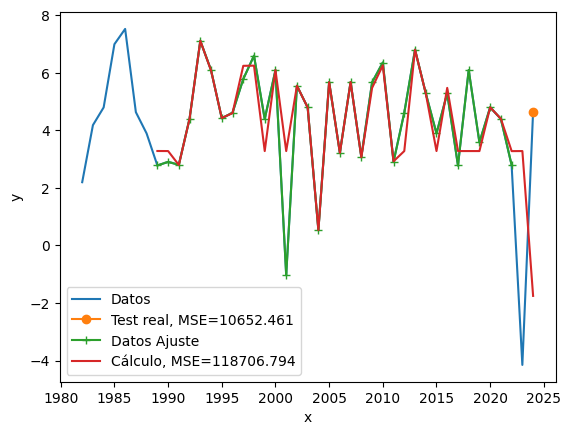

In [408]:
#Escala logaritmica Sigma 1
nt=1 #Valores de Test
X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_df['y'].values[:-nt]
X=np.log(X)
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08*.3, random_state=101, shuffle=False)
x_norm=X_train
t_norm=y_train
# 12.3 regr = MLPRegressor(hidden_layer_sizes=(3,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 11.8 regr = MLPRegressor(hidden_layer_sizes=(2,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 94256 generaliza regr = MLPRegressor(hidden_layer_sizes=(8,2) , random_state = 101, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 12.3 generaliza pero explota mucho regr = MLPRegressor(hidden_layer_sizes=(4,3) , random_state = 120, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 11.4 generaliza muy poco regr = MLPRegressor(hidden_layer_sizes=(3,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 25.109 generaliza poco 
regr = MLPRegressor(hidden_layer_sizes=(7,4) , random_state = 1002, activation='tanh', solver='lbfgs',max_iter=40000).fit(X_train, y_train)
y_pred_test = regr.predict(np.log(new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
#desplazar a la izquierda y poner y_pred_test en x_6
mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
mean_sq_total = mean_squared_error((data['Sigma1'].tail(len(y_test))).values, np.exp(y_test))
plt.plot(data['t'],np.log(data['Sigma1']),label='Datos')
plt.plot(data['t'].tail(nt),np.log(data['Sigma1'].tail(nt)),'-o', label='Test real, MSE='+str(np.round(mean_sq_total,3))) # ,label='Test real, MSET='+str(np.round(mean_sq_total,3))
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1),t_norm,'-+',label='Datos Ajuste')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0, 1),y_pred_test,label='Cálculo')
# plt.plot(np.arange(1+Anio_Final-len(y_test)-nt, 1+Anio_Final-nt, 1),y_test,'-o',label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
# plt.plot(data['t'],data['Sigma2'],label='Datos')
# data = df_KL_T.T
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_7240\3388118877.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



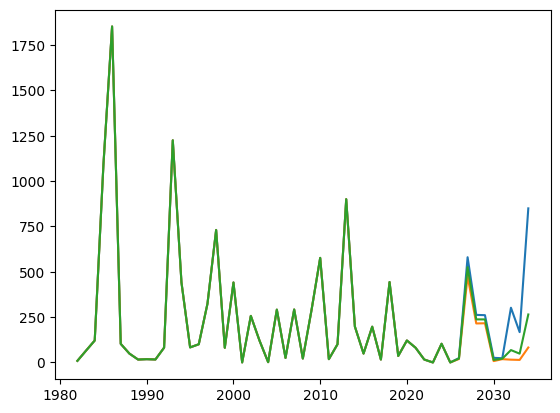

In [409]:
Anio_Final_p=2040 #Sigma 1
from numpy.random.mtrand import randn
rng = np.random.default_rng(42)
# random_state = np.random.RandomState(seed=1)
# Varianza de ruido Monte Carlo
psi=0.10500
random_state = np.random.RandomState(seed=1) #h=random_state.randn(1)
for hh in range(0,100,1): #100 realizaciones, quedan en df4
  #Escala logaritmica
  data_p=new_df.copy()
  data_pred=data.copy()
  X = new_df[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
  for i in range(Anio_Final+1,Anio_Final_p,1):
    y_pred_test = regr.predict(np.log(data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
    aux_vec=data_p[['Sigma1', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1];
    aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
    aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))
    df2 = pd.DataFrame({ 'Sigma1': [aux_vecd[0]],
                        'x_1':[aux_vecd[1]],
                        'x_2':[aux_vecd[2]],
                        'x_3':[aux_vecd[3]],
                        'x_4':[aux_vecd[4]],
                        'x_5':[aux_vecd[5]],
                        'x_6': [aux_vecd[6]] }, index=[i])
    dfa=[data_p, df2]
    data_p= pd.concat(dfa)
    #df_KLv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
    df3 = pd.DataFrame({ 't': pd.to_datetime(str(int(i))+'-'+str(12) +'-'+str(31) +' '+'00:00:00'),                        
                        'Sigma1': [aux_vecd[0]],
                      }, index=[i])
    dfp=[data_pred,df3]
    data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
  # hh=1
  if hh == 0:
    df4=pd.DataFrame(data_pred[['Sigma1','t']].copy())    
    df4.rename(columns={'Sigma1': 0}, inplace=True)
  elif hh > 0:
    df4.insert(loc=0, column=hh, value = data_pred['Sigma1'].values)
    # DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,
    #  which has poor performance.  
    # Consider joining all columns at once using pd.concat(axis=1) instead. 
    # To get a de-fragmented frame, use `newframe = frame.copy()`
# data_p.tail(3) df4.tail(3)
#desplazar a la izquierda y poner y_pred_test en x_6
# mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
df_log=np.log(df4.loc[:,99:0])
NN=20
var_ls1=df_log.var(axis=1) #Luego le saco la raiz cuadrada para obtener la desv standar
mean_ls1=df_log.mean(axis=1)
df_mean_ls1=pd.DataFrame({'t': df4['t'],'mean_ls1': mean_ls1,'Desv_ls1': np.sqrt(var_ls1)},)
mask = (df4['t'] < pd.Timestamp(2034,7,1))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
plt.plot(df_mean_ls1['t'][mask],np.exp(df_mean_ls1['mean_ls1'][mask]+df_mean_ls1['Desv_ls1'][mask])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'][mask],np.exp(df_mean_ls1['mean_ls1'][mask]-df_mean_ls1['Desv_ls1'][mask])) #mas 1 desv standar
plt.plot(df_mean_ls1['t'][mask], np.exp(df_mean_ls1['mean_ls1'][mask]))
plt.show()

In [410]:
#Escala Lineal SIGMA 2
def window_input2(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['Sigma2'].shift(-i)
        i = i + 1
    if i == window_length:
        df['y'] = df['Sigma2'].shift(-i)
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
    return df
new_dfs2 = window_input2(n1, data) #n1 es cinco, ancho de ventana
X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values #n1 es cinco, la long de la lista de nombres
# X = new_df[[5, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values #n1 es cinco, la long de la lista de nombres
# X = new_df[[5, 'x_1', 'x_2', 'x_3', 'x_4']].values #n1 es cinco, la long de la lista de nombres
y = new_dfs2['y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42, shuffle=False)
baseline_pred = []
for row in X_test:
    baseline_pred.append(np.mean(row))
# plt.plot(y_test)
# plt.show()

### Escala logaritmica sigma 2 DW

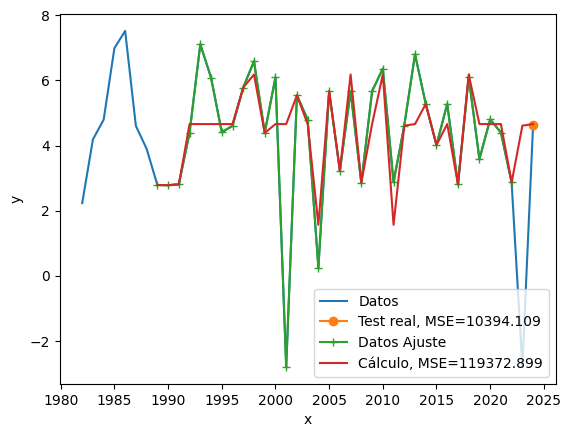

In [411]:
#Escala logaritmica
nt=1 #Valores de Test
X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
# X = new_df[[4, 'x_1', 'x_2', 'x_3', 'x_4','x_5']].values[:-nt] #n1 es cinco, la long de la lista de nombres
y = new_dfs2['y'].values[:-nt]
X=np.log(X)
y=np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08*.3, random_state=1000, shuffle=False)
x_norm=X_train
t_norm=y_train
# 8.99 generaliza en exceso regr = MLPRegressor(hidden_layer_sizes=(3,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 8.166 generaliza en defecto regr = MLPRegressor(hidden_layer_sizes=(2,5) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
#generaliza bien regr = MLPRegressor(hidden_layer_sizes=(8,2) , random_state = 10110, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 8.3 generaliza pero explota mucho regr = MLPRegressor(hidden_layer_sizes=(4,4), random_state = 10, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 11.4 generaliza muy poco regr = MLPRegressor(hidden_layer_sizes=(3,3) , random_state = 5, activation='tanh', solver='lbfgs',max_iter=20000).fit(X_train, y_train)
# 25.109 generaliza bien 
regr = MLPRegressor(hidden_layer_sizes=(7,2) , random_state = 2510001, activation='tanh', solver='lbfgs',max_iter=40000).fit(X_train, y_train)
y_pred_test = regr.predict(np.log(new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
#desplazar a la izquierda y poner y_pred_test en x_6
mean_sq_err = mean_squared_error(new_dfs2['y'].values, y_pred_test)
mean_sq_total = mean_squared_error((data['Sigma2'].tail(len(y_test))).values, np.exp(y_test))
plt.plot(data['t'],np.log(data['Sigma2']),label='Datos')
plt.plot(data['t'].tail(nt),np.log(data['Sigma2'].tail(nt)),'-o', label='Test real, MSE='+str(np.round(mean_sq_total,3))) # ,label='Test real, MSET='+str(np.round(mean_sq_total,3))
# plt.plot(np.arange(2023-nd-nd_, 2023-nd, 1),t_norm,'-+',label='datos conocidos')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1),t_norm,'-+',label='Datos Ajuste')
# plt.plot(np.arange(1+Anio_Final-len(y_pred_test)-0, 1+Anio_Final-0, 1),y_pred_test,label='Cálculo')
# plt.plot(np.arange(1+Anio_Final-len(y_test)-nt, 1+Anio_Final-nt, 1),y_test,'-o',label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0-(len(y_pred_test)-len(y_train)), 1), format='%Y'),t_norm,'-+',label='Datos Ajuste')
plt.plot(pd.to_datetime(np.arange(2+Anio_Final-len(y_pred_test)-0, 2+Anio_Final-0, 1), format='%Y'),y_pred_test,label='Cálculo, MSE='+str(np.round(mean_sq_err,3)))
# plt.plot(data['t'],data['Sigma2'],label='Datos')
# data = df_KL_T.T
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_7240\2891421941.py:38: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



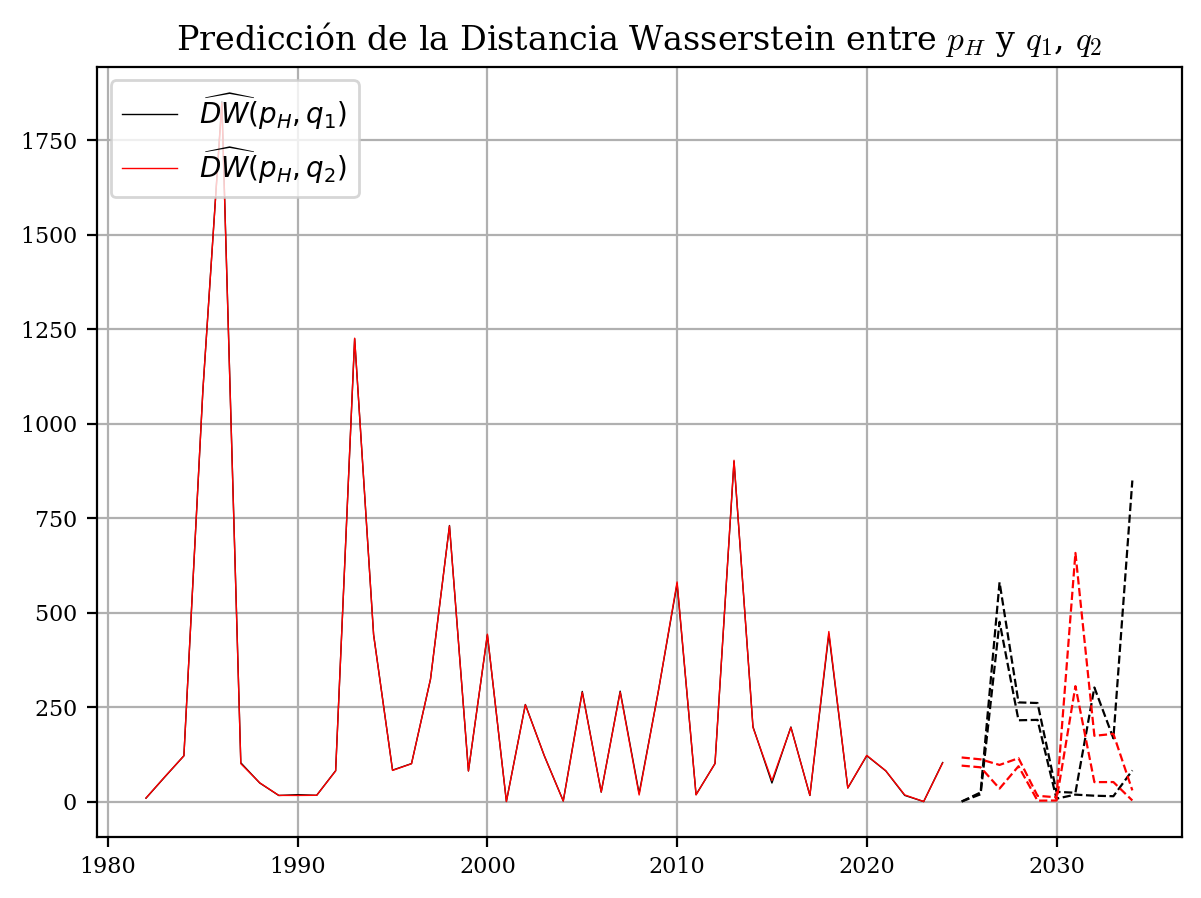

In [412]:
Anio_Final_p=2040
from numpy.random.mtrand import randn
rng = np.random.default_rng(42)
# random_state = np.random.RandomState(seed=1)
# Varianza de ruido Monte Carlo Sigma2
psi=0.10500
random_state = np.random.RandomState(seed=10) #h=random_state.randn(1)
for hh in range(0,100,1): #100 realizaciones, quedan en df4
  #Escala logaritmica
  data_p=new_dfs2.copy()
  data_pred=data.copy()
  X = new_dfs2[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[:-nt] #n1 es cinco, la long de la lista de nombres
  for i in range(Anio_Final+1,Anio_Final_p,1):
    y_pred_test = regr.predict(np.log(data_p[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values))
    aux_vec=data_p[['Sigma2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6']].values[-1];
    aux_vecd=np.roll(aux_vec,1) #lo movió a la derecha, re escribo el elemento 0 con y_est
    aux_vecd[0]=np.squeeze(np.exp(y_pred_test[-1]+psi*random_state.randn(1)))
    df2 = pd.DataFrame({ 'Sigma2': [aux_vecd[0]],
                        'x_1':[aux_vecd[1]],
                        'x_2':[aux_vecd[2]],
                        'x_3':[aux_vecd[3]],
                        'x_4':[aux_vecd[4]],
                        'x_5':[aux_vecd[5]],
                        'x_6': [aux_vecd[6]] }, index=[i])
    dfa=[data_p, df2]
    data_p= pd.concat(dfa)
    #df_KLv.loc[i,'t']=pd.to_datetime( str(int(t_x[i]))+'-'+str(12) +'-'+str(31) +' '+'00:00:00')  
    df3 = pd.DataFrame({ 't': pd.to_datetime(str(int(i))+'-'+str(12) +'-'+str(31) +' '+'00:00:00'),                        
                        'Sigma2': [aux_vecd[0]],
                      }, index=[i])
    dfp=[data_pred,df3]
    data_pred=pd.concat(dfp) #Agrego la predicción en data_pred
  # hh=1
  if hh == 0:
    df4=pd.DataFrame(data_pred[['Sigma2','t']].copy())    
    df4.rename(columns={'Sigma2': 0}, inplace=True)
  elif hh > 0:
    df4.insert(loc=0, column=hh, value = data_pred['Sigma2'].values)
    # DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,
    #  which has poor performance.  
    # Consider joining all columns at once using pd.concat(axis=1) instead. 
    # To get a de-fragmented frame, use `newframe = frame.copy()`
# data_p.tail(3) df4.tail(3)
#desplazar a la izquierda y poner y_pred_test en x_6
# mean_sq_err = mean_squared_error(new_df['y'].values, y_pred_test)
# df_log=np.log(df4)
df_log=np.log(df4.loc[:,99:0])
NN=20
var_ls2=df_log.var(axis=1) #Luego le saco la raiz cuadrada para obtener la desv standar
mean_ls2=df_log.mean(axis=1)
df_mean_ls2=pd.DataFrame({'t': df4['t'],'mean_ls2': mean_ls2,'Desv_ls2': np.sqrt(var_ls2)},)
mask_i = (df4['t'] < pd.Timestamp(2024,6,30))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
mask = (df4['t'] < pd.Timestamp(2034,7,1))  #& (df_CAPE['Fecha '] <= pd.Timestamp(Anio_inicial+i+1,6,30))  
mask_p= (df4['t'] <= pd.Timestamp(2034,7,1)) & (df4['t'] > pd.Timestamp(2024,7,1))
with plt.style.context(['no-latex','ieee']): #Poner en Windows, en Colab no es necesario ya que se instala el TexLive
#with plt.style.context('science'):
# with plt.style.context('dark_background'):
# with plt.style.context('seaborn-v0_8-pastel'):
# with plt.style.context('seaborn-v0_8-poster'):
    figDW, PS2_KL = plt.subplots(1,1,figsize=(7,5), dpi= 200) #fig, axs = plt.subplots(2,NA,figsize=(13,10), dpi= 100)
# from datetime import datetime as dt
#df.set_index('Date', inplace=True)
PS2_KL.plot(df_mean_ls1['t'][mask_i], np.exp(df_mean_ls1['mean_ls1'][mask_i]),linestyle='solid', color= 'k', linewidth=0.5)
PS2_KL.plot(df_mean_ls2['t'][mask_i], np.exp(df_mean_ls2['mean_ls2'][mask_i]), linestyle='solid',color='r', linewidth=0.5)
PS2_KL.plot(df_mean_ls1['t'][mask_p],np.exp(df_mean_ls1['mean_ls1'][mask_p]+df_mean_ls1['Desv_ls1'][mask_p]),linestyle='dashed', color='k' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls1['t'][mask_p],np.exp(df_mean_ls1['mean_ls1'][mask_p]-df_mean_ls1['Desv_ls1'][mask_p]), linestyle='dashed',color='k' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls2['t'][mask_p],np.exp(df_mean_ls2['mean_ls2'][mask_p]+df_mean_ls2['Desv_ls2'][mask_p]),linestyle='dashed', color='r' , linewidth=0.8) #mas 1 desv standar
PS2_KL.plot(df_mean_ls2['t'][mask_p],np.exp(df_mean_ls2['mean_ls2'][mask_p]-df_mean_ls2['Desv_ls2'][mask_p]), linestyle='dashed',color= 'r' , linewidth=0.8) #mas 1 desv standar
PS2_KL.legend([r'$\widehat{DW}(p_H,q_1)$', r'$\widehat{DW}(p_H,q_2)$'],loc='upper left')
# plt.xlabel(r'Año hasta '+ str(int(df_mean_ls1.iloc[-1]['YEAR'])))
plt.title(r'Predicción de la Distancia Wasserstein entre $p_H$ y $q_1$, $q_2$')
plt.grid('True') 
plt.show()

## Cierre Predicción Python

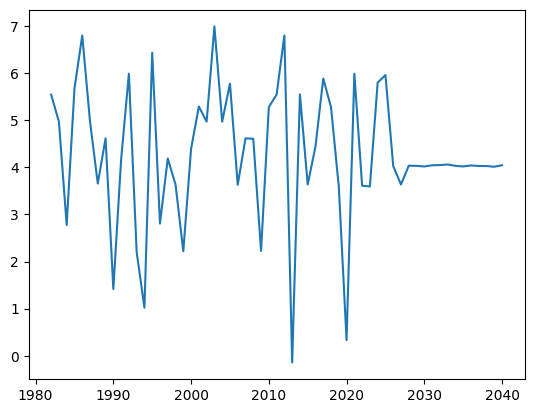

In [90]:
df4.tail(3)
df_log1=np.log(df4.loc[:,99:0])
# df_log0=np.log(df4.loc[:,0])
mean_ls1
#  df_KLv.loc[:,'t':'Sigma2']
# df4=pd.DataFrame(data_pred[['Sigma1','t']].copy())    

mean_ls1=df_log.mean(axis=1)
df_mean_ls1=pd.DataFrame({'t': df4['t'],'mean_ls1': mean_ls1},)
plt.plot(df_mean_ls1['t'], df_mean_ls1['mean_ls1'])
plt.show()


In [67]:
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [91]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=df.index, y=df['H']*100, mode='lines', name='Humedad de suelo Vol/Vol'))
# fig.add_trace(go.Scatter(x=df.index, y=df['T'], mode='lines', name='Temperatura de suelo [ºC]'))
fig.add_trace(go.Scatter(x=df_KLv['t'], y=df_KLv['Sigma1'], mode='lines', name='Sigma 1'))
fig.add_trace(go.Scatter(x=df_KLv['t'], y=df_KLv['Sigma2'], mode='lines', name='Sigma 2'))
#fig.add_trace(go.Scatter(x=df['Date'], y=df['T'], mode='lines', name='Temperatura de suelo [ºC]'))
# Customize the layout
fig.update_layout(title='Divergencia Kullback-Leibler',
                  xaxis_title='Tiempo [Seg.]',
                  yaxis_title='Valores',
                  legend_title='Variables',
                  showlegend=True)
# Display the interactive Plotly chart
fig.show()

## Filtrado digital

In [113]:
dfxi = pd.DataFrame();dfxc =pd.DataFrame();
Nmax=43;
t_eje=np.round(np.linspace(0,42,Nmax)+Anio_inicial)
x=[[0],[0]]
#u= (df_KL_T.values[0])
u=df_KLv['Sigma1']
dfxc['u1']=u;
y=np.zeros(Nmax);y[0]=u[0]; y[1]=u[1]
print('Media de sigma1',y[0])
x=np.array([[y[0]],[y[0]]]);
x=.17*x
for i in range(Nmax-1):
  x1=Mat_Ad@x+Mat_Bd*u[i]
  # u=1.
  y[i]=(C@x)[0] #y tiene su tiempo en k, y xk es el anterior
  x=x1
plt.semilogy(t_eje[2:-1],y[2:-1],'r-o',linewidth=4,markersize=.1, label='VE tiempo discreto')
plt.semilogy(t_eje,u,'r-o',markersize=.05)
dfxi['y1']=(y[2:-1]) #Las dos primeras, no van
# 0 z^2 +  0.001668s z - 0.001665
# -------------------------------
# z^2 - 2 z + 0.9998
# y=np.zeros(Nmax); u=np.ones(Nmax);u[0]=0;u[1]=0;u[2]=0;k=2;
# for i in range(Nmax-k):
#   y[k]=u[k]*num[0]+u[k-1]*num[1]+u[k-2]*num[2]-y[k-1]*den[1]-y[k-2]*den[2]
#   k=k+1
# plt.plot(t_eje,y)
x=[[0],[0]]; 
#u= (df_KL_T.values[1])
u=df_KLv['Sigma2']
dfxc['u2']=u;
y=np.zeros(Nmax);
y[0]=u[0];y[1]=u[1]
y[1]=np.mean(u[0]);y[0]=y[1]
print('Media de sigma2',y[0])
x=np.array([[y[1]],[y[0]]])
x=.317*x
# x=[[0],[0]];
for i in range(Nmax-1):
  x1=Mat_Ad@x+Mat_Bd*u[i]
  # u=1.
  y[i]=(C@x)[0] #y tiene su tiempo en k, y xk es el anterior
  x=x1
plt.semilogy(t_eje[2:-1],y[2:-1],'b-o',linewidth=4,markersize=.1, label='VE tiempo discreto')
plt.semilogy(t_eje,u,'b-o',markersize=.05)
plt.legend([r'Divergencia Kullback-Leibler $\sigma_1$ filtrado',r'Divergencia Kullback-Leibler $\sigma_1$',r'Divergencia Kullback-Leibler $\sigma_2$ filtrado',r'Divergencia Kullback-Leibler $\sigma_2$'])
dfxi['y2']=(y[2:-1])
dfxi['t']=t_eje[2:-1]
dfxc['t']=t_eje;

Media de sigma1 0.049617245079460526
Media de sigma2 0.03969011746150797


In [114]:
fig, ax1 = plt.subplots(figsize=(10,5), dpi= 150) #plt.plot(df_KL_T.iloc[0], label='KL 1')
plt.plot(df_KLv['t'], df_KLv['Sigma1'], df_KLv['t'], df_KLv['Sigma2'])
plt.legend([r'KL $\sigma_1$', r'KL $\sigma_2$'],loc=2)
#plt.legend(loc=2)
df_KLv.to_csv("Div_KL_2024.csv", encoding='utf-8', index=True)

In [115]:
dfxc.tail(3)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi= 150)
g1=sns.regplot(x='t', y='u1', data=dfxc, ax=axs[0])
g1.set_ylabel(r'$\sigma_1$',rotation=0)
g1.set_title(r'Divergencia Kullback-Leibler $\sigma_1$')
g1.set_yscale('log')
g1.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
#plt.title(r'Divergencia Kullback-Leibler C $\sigma_1$')
g2=sns.regplot(x='t', y='u2', data=dfxc, ax=axs[1])
g2.set_ylabel(r'$\sigma_2$',rotation=0)
g2.set_yscale('log')
g2.set_title(r'Divergencia Kullback-Leibler $\sigma_2$')
g2.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5), dpi=150)
g3=sns.regplot(x='t', y='y1', data=dfxi, ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler F $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='y2', data=dfxi, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler F $\sigma_2$')

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\326944385.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\326944385.py:13: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\326944385.py:17: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\326944385.py:23: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



Text(0.5, 1.0, 'Divergencia Kullback-Leibler F $\\sigma_2$')

<>:3: SyntaxWarning:

invalid escape sequence '\s'

<>:3: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\148268870.py:3: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\148268870.py:4: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\148268870.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



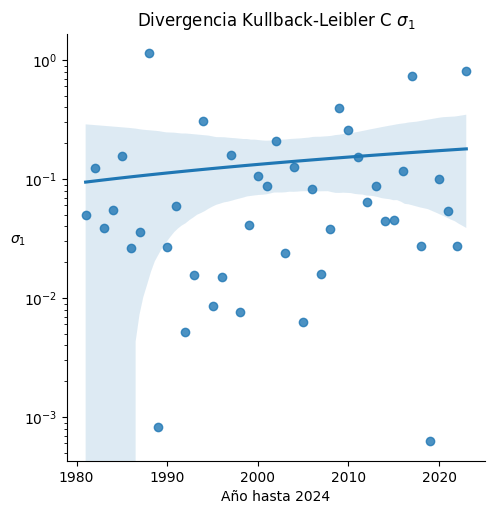

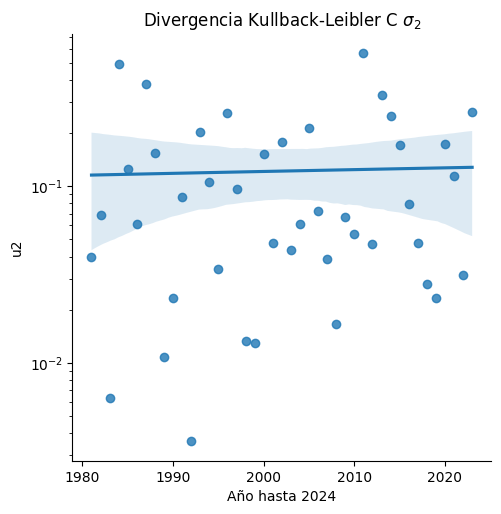

In [127]:
sns.lmplot(x='t', y='u1', data = dfxc, ci=95,fit_reg=True) # plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\sigma_1$',rotation=0)
plt.xlabel('Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.title(r'Divergencia Kullback-Leibler C $\sigma_1$')
sns.lmplot(x='t', y='u2', data = dfxc, ci=95,fit_reg=True) # plt.xscale('log')
plt.xlabel('Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.yscale('log')
plt.title(r'Divergencia Kullback-Leibler C $\sigma_2$')
plt.show()

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\3965417895.py:2: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead

C:\Users\julia\AppData\Local\Temp\ipykernel_18820\3965417895.py:6: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



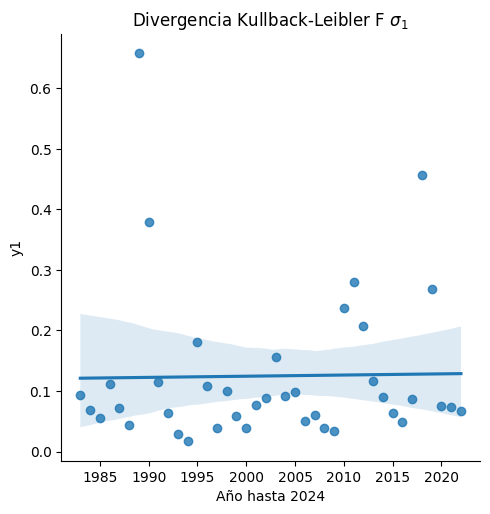

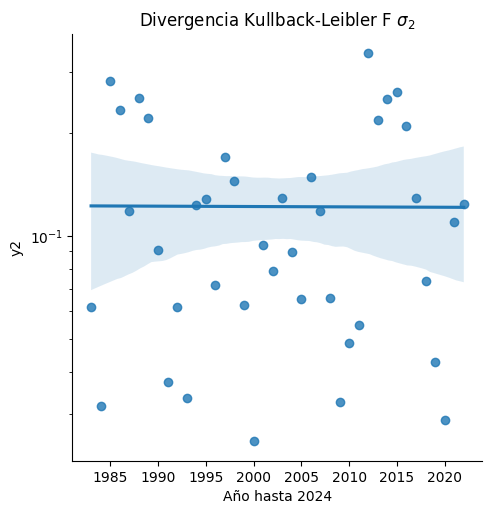

In [120]:
sns.lmplot(x='t', y='y1', data = dfxi, ci=95,fit_reg=True) # plt.xscale('log')
plt.xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.title(r'Divergencia Kullback-Leibler F $\sigma_1$')
sns.lmplot(x='t', y='y2', data = dfxi, ci=95,fit_reg=True) # plt.xscale('log')
plt.yscale('log')
plt.xlabel('Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.yscale('log')
plt.title(r'Divergencia Kullback-Leibler F $\sigma_2$')
plt.show()

## Suavizado exponencial
$p_t=l_t$

$l_t=\alpha y_t+(1-\alpha)l_{t-1}$

$p_t$ es la salida, $y_t$ es la entrada y $l_t$ es la variable de estado.

Media de sigma1 0.13687319163396514
Media de sigma2 0.12177808480171189


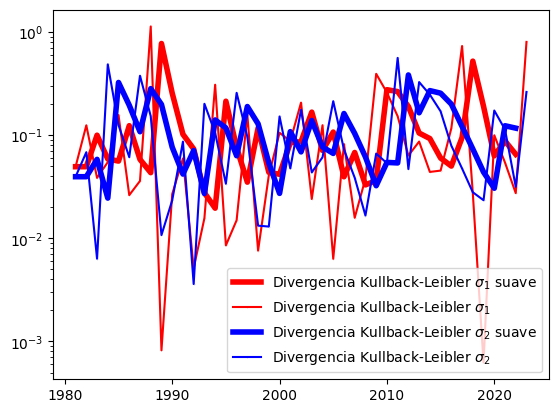

In [125]:
dfxs = pd.DataFrame();dfxc =pd.DataFrame();
Nmax=43;
t_eje=np.round(np.linspace(0,42,Nmax)+Anio_inicial)
#u= (df_KL_T.values[0])
u=df_KLv['Sigma1']
dfxc['u1']=u;
y=np.zeros(Nmax);
print('Media de sigma1',np.mean(u))
alfa=.6712
y[0]=u[0];x=u[0]
for i in range(Nmax-1):
  x1=alfa*u[i]+(1-alfa)*x
  y[i]=x #y tiene su tiempo en k, y xk es el anterior
  x=x1
plt.semilogy(t_eje[0:-1],y[0:-1],'r-o',linewidth=4,markersize=.1, label='VE tiempo discreto')
plt.semilogy(t_eje,u,'r-o',markersize=.05)
dfxs['y1']=(y[0:-1]) #Las dos primeras, no van
x=[[0],[0]];
#u= (df_KL_T.values[1])
u=df_KLv['Sigma2']
dfxc['u2']=u;
y=np.zeros(Nmax);
y[0]=u[0];
# y[1]=np.mean(u[0]);y[0]=y[1]
print('Media de sigma2',np.mean(u))
alfa=.649992
# x=np.array([[y[1]],[y[0]]]);
y[0]=u[0];x=u[0]
for i in range(Nmax-1):
  x1=alfa*u[i]+(1-alfa)*x
  y[i]=x #y tiene su tiempo en k, y xk es el anterior
  x=x1
plt.semilogy(t_eje[0:-1],y[0:-1],'b-o',linewidth=4,markersize=.1, label='VE tiempo discreto')
plt.semilogy(t_eje,u,'b-o',markersize=.05)
plt.legend([r'Divergencia Kullback-Leibler $\sigma_1$ suave',r'Divergencia Kullback-Leibler $\sigma_1$',r'Divergencia Kullback-Leibler $\sigma_2$ suave',r'Divergencia Kullback-Leibler $\sigma_2$'])
dfxs['y2']=(y[0:-1])
dfxs['t']=t_eje[0:-1]
dfxc['t']=t_eje
plt.show()

In [ ]:
sns.lmplot(x='t', y='u1', data = dfxi, ci=95,fit_reg=True) # plt.xscale('log')
plt.xlabel('Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.title('Divergencia Kullback-Leibler C $\sigma_1$')
plt.yscale('log')
sns.lmplot(x='t', y='u2', data = dfxi, ci=95,fit_reg=True) # plt.xscale('log')
plt.yscale('log')
plt.xlabel('Año hasta '+ str(int(df.tail(1)['YEAR'])));
plt.title('Divergencia Kullback-Leibler C $\sigma_2$')
plt.show()

## Filtrado suavizado exponencial

In [ ]:
dfxi.tail(3)
fig, axs = plt.subplots(1, 2, figsize=(10, 5),dpi=150)
g1=sns.regplot(x='t', y='u1', data=dfxc, ax=axs[0])
g1.set_ylabel(r'$\sigma_1$',rotation=0)
g1.set_title(r'Divergencia Kullback-Leibler $\sigma_1$')
g1.set_yscale('log')
g1.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g2=sns.regplot(x='t', y='u2', data=dfxc, ax=axs[1])
g2.set_ylabel(r'$\sigma_2$',rotation=0)
g2.set_yscale('log')
g2.set_title(r'Divergencia Kullback-Leibler $\sigma_2$')
g2.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5),dpi=150)
g3=sns.regplot(x='t', y='y1', data=dfxs, ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler S $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='y2', data=dfxs, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler S $\sigma_2$')

# Comparativa de tendencias filtradas

In [ ]:
Max_DPI=50
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi= Max_DPI)
g1=sns.regplot(x='t', y='u1', data=dfxc, ax=axs[0])
g1.set_ylabel(r'$\sigma_1$',rotation=0)
g1.set_title(r'Divergencia Kullback-Leibler $\sigma_1$')
g1.set_yscale('log')
g1.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
#plt.title(r'Divergencia Kullback-Leibler C $\sigma_1$')
g2=sns.regplot(x='t', y='u2', data=dfxc, ax=axs[1])
g2.set_ylabel(r'$\sigma_2$',rotation=0)
g2.set_yscale('log')
g2.set_title(r'Divergencia Kullback-Leibler $\sigma_2$')
g2.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5), dpi=Max_DPI)
g3=sns.regplot(x='t', y='y1', data=dfxi, ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler F $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='y2', data=dfxi, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler F $\sigma_2$')

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5),dpi=Max_DPI)
g3=sns.regplot(x='t', y='y1', data=dfxs, order=1,ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler S $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='y2', data=dfxs, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler S $\sigma_2$')

In [ ]:
#sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2, ci=None, scatter_kws={"s": 80});
#fig, axs1 = plt.subplots(1, 2, figsize=(10, 5),dpi=Max_DPI)
#g5=sns.lmplot(x='t', y='y1', data=dfxs, order=1, ci=95, ax=axs1[0])
#g6=sns.lmplot(x='t', y='y2', data=dfxs, order=1, ci=95);
Max_DPI=50
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi= Max_DPI)
g1=sns.regplot(x='t', y='u1', data=dfxc, ax=axs[0])
g1.set_ylabel(r'$\sigma_1$',rotation=0)
g1.set_title(r'Divergencia Kullback-Leibler $\sigma_1$')
g1.set_yscale('log')
g1.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
#plt.title(r'Divergencia Kullback-Leibler C $\sigma_1$')
g2=sns.regplot(x='t', y='u2', data=dfxc, ax=axs[1])
g2.set_ylabel(r'$\sigma_2$',rotation=0)
g2.set_yscale('log')
g2.set_title(r'Divergencia Kullback-Leibler $\sigma_2$')
g2.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5), dpi=Max_DPI)
g3=sns.regplot(x='t', y='u1', data=dfxc, order=2, ci=90, ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler F $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='u2', data=dfxc, order=2, ci=90, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler F $\sigma_2$')

fig, axs1 = plt.subplots(1, 2, figsize=(10, 5),dpi=Max_DPI)
g3=sns.regplot(x='t', y='u1', data=dfxc, order=3,ci=90, ax=axs1[0])
g3.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])))
g3.set_title(r'Divergencia Kullback-Leibler S $\sigma_1$')
g3.set_yscale('log')
g3.set_ylabel(r'$\sigma_1$',rotation=0)
g4=sns.regplot(x='t', y='u2', data=dfxc, order=3, ci=90, ax=axs1[1])
g4.set_ylabel(r'$\sigma_2$',rotation=0)
g4.set_xlabel(r'Año hasta '+ str(int(df.tail(1)['YEAR'])));
g4.set_yscale('log')
g4.set_title(r'Divergencia Kullback-Leibler S $\sigma_2$')

# Cálculo de filtro digital

In [ ]:
# https://depts.washington.edu/airlab/wordpress/wp-content/uploads/2022/02/fuller_greiner_moore_murray_vanpaassen_yorke_python_control_cdc21-compressed.pdf
!pip install control #7seg

In [92]:
import matplotlib.pyplot as plt
import scipy.signal
from numpy.linalg import eig
from scipy.linalg import expm
import numpy as np
from sympy import *
#https://python-control.readthedocs.io/en/0.10.0/
from control.matlab import *

In [93]:
s=symbols('s')
P=(90)/((s+10)*(s+9))
G=apart(P, full=True).doit()
G

-90/(s + 10) + 90/(s + 9)

In [104]:
A=np.array([[-10, 0],[ 0, -9]]);
B=np.array([[1],[1]]);
C=np.array([-90,90]);
D=0;
G=ss2tf(A,B,C,D)
print('A=',A,'\n','B=',B,'\n','C=',C,'\n','D=',D)
print('\n G=',G)

A= [[-10   0]
 [  0  -9]] 
 B= [[1]
 [1]] 
 C= [-90  90] 
 D= 0

 G= <TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-1.421e-14 s + 90
-----------------
 s^2 + 19 s + 90



In [105]:
T0=abs(1/5.)
H=np.array([[0],[0]]); d_tao=T0/100;tao=0.;
Mat_Ac=A;Mat_Bc=B;
for hh in range(100):
    dH=expm(Mat_Ac*tao)@Mat_Bc*d_tao;
    H=H+dH;
    tao=tao+d_tao;
Mat_Bd=H;
Mat_Ad=expm(Mat_Ac*T0);
print('Atd=',Mat_Ad)
print('Btd=',Mat_Bd)
raices,v_v=eig(Mat_Ad)
print('Polos en z=',abs(raices))
Gz=ss2tf(Mat_Ad,Mat_Bd,C,D)
print('Gz=',Gz)
num1=Gz.num[0][0]
den=Gz.den[0][0]
num=[4, 5, 1.5];
# den=[1, 2, 2];
num[0]=0.
num[1]=num1[0]
num[2]=num1[1]

Atd= [[0.13533528 0.        ]
 [0.         0.16529889]]
Btd= [[0.08733402]
 [0.09358177]]
Polos en z= [0.13533528 0.16529889]
Gz= <TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.5623 s + 0.1594
------------------------
s^2 - 0.3006 s + 0.02237



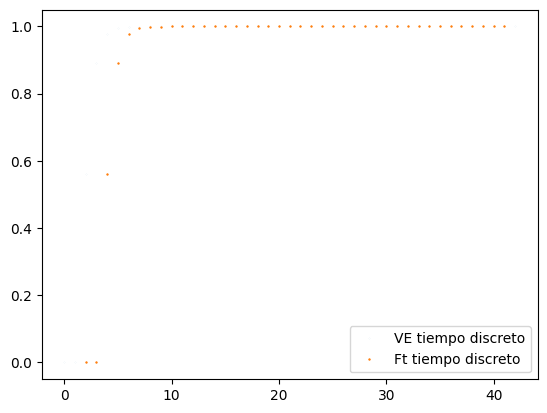

In [106]:
Nmax=43;
t_eje=np.linspace(0,42,Nmax)
x=[[0],[0]];
y=np.zeros(Nmax);u=0;
for i in range(Nmax-1):
  x=Mat_Ad@x+Mat_Bd*u
  u=1.
  y[i+1]=[C@x][0][0] #y tiene su tiempo en k, y xk es el anterior
plt.plot(t_eje,y,'o',markersize=.02, label='VE tiempo discreto')
# 0 z^2 +  0.001668s z - 0.001665
# -------------------------------
# z^2 - 2 z + 0.9998
y=np.zeros(Nmax); u=np.ones(Nmax);u[0]=0;u[1]=0;u[2]=0;k=2;
for i in range(Nmax-k):
  y[k]=u[k]*num[0]+u[k-1]*num[1]+u[k-2]*num[2]-y[k-1]*den[1]-y[k-2]*den[2]
  k=k+1
plt.plot(t_eje[2:-1],y[2:-1],'+',  markersize=1, label='Ft tiempo discreto')
plt.legend()
plt.show()

# Fin cálculo de filtro digital

In [97]:
P=(100)/((s+10)*(s+10))
G=apart(P, full=True).doit()
G

100/(s + 10)**2

In [98]:
A=np.array([[-10, 1],[ 0, -10]]);
B=np.array([[0],[1]]);
C=np.array([100, 0]);
D=0;
G=ss2tf(A,B,C,D)
print('A=',A,'\n','B=',B,'\n','C=',C,'\n','D=',D)
print('\n G=',G)

A= [[-10   1]
 [  0 -10]] 
 B= [[0]
 [1]] 
 C= [100   0] 
 D= 0

 G= <TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      100
----------------
s^2 + 20 s + 100



In [99]:
from scipy.linalg import expm
T0=abs(1/10.)
H=np.array([[0],[0]]); d_tao=T0/100;tao=0.;
Mat_Ac=A;Mat_Bc=B;
for hh in range(100):
    dH=expm(Mat_Ac*tao)@Mat_Bc*d_tao;
    H=H+dH;
    tao=tao+d_tao;
Mat_Bd=H;
Mat_Ad=expm(Mat_Ac*T0);

In [100]:
print('Atd=',Mat_Ad)
print('Btd=',Mat_Bd)
raices,v_v=eig(Mat_Ad)
print('Polos en z=',abs(raices))

Atd= [[0.36787944 0.03678794]
 [0.         0.36787944]]
Btd= [[0.00262393]
 [0.06352864]]
Polos en z= [0.36787944 0.36787944]


In [101]:
Gz=ss2tf(Mat_Ad,Mat_Bd,C,D)
print(Gz)
num1=Gz.num[0][0]
den=Gz.den[0][0]
num[0]=0.
num[1]=num1[0]
num[2]=num1[1]

<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   0.2624 s + 0.1372
-----------------------
s^2 - 0.7358 s + 0.1353



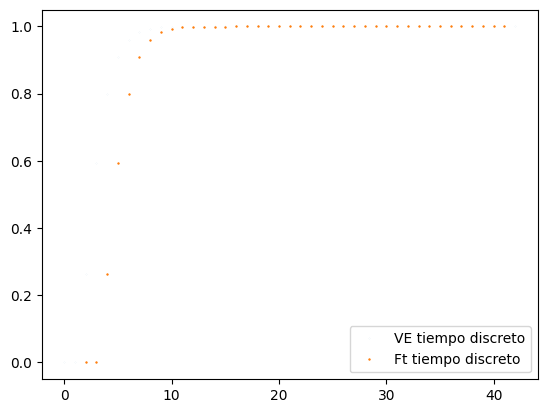

In [102]:
Nmax=43;
t_eje=np.linspace(0,42,Nmax)
x=[[0],[0]];
y=np.zeros(Nmax);u=0;
for i in range(Nmax-1):
  x=Mat_Ad@x+Mat_Bd*u
  u=1.
  y[i+1]=[C@x][0][0] #y tiene su tiempo en k, y xk es el anterior
plt.plot(t_eje,y,'o',markersize=.02, label='VE tiempo discreto')
# 0 z^2 +  0.001668s z - 0.001665
# -------------------------------
# z^2 - 2 z + 0.9998
y=np.zeros(Nmax); u=np.ones(Nmax);u[0]=0;u[1]=0;u[2]=0;k=2;
for i in range(Nmax-k):
  y[k]=u[k]*num[0]+u[k-1]*num[1]+u[k-2]*num[2]-y[k-1]*den[1]-y[k-2]*den[2]
  k=k+1
plt.plot(t_eje[2:-1],y[2:-1],'+',  markersize=1, label='Ft tiempo discreto')
plt.legend()
plt.show()

In [ ]:
y=np.zeros(Nmax); u=np.ones(Nmax);u[0]=0;u[1]=0;u[2]=0;k=2;
for i in range(Nmax-k):
  y[k]=u[k]*num[0]+u[k-1]*num[1]+u[k-2]*num[2]-y[k-1]*den[1]-y[k-2]*den[2]
  k=k+1

# Cierre

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/Curso2023 #Copia uno por uno
import os
import shutil
fnames = ['2023_CAPE_.csv','2023_INA_.csv','2023_INA_EZE.csv','2023_Islas_Malvinas.csv','2023_LOIRA_FR.csv','POWER_Point_Daily_20000101_20221212_027d6551S_065d2454W_LST_01.csv','Config_Inicio.txt'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/2020 Curso ML Extensionista', fname)
  shutil.copyfile(src, dst)